In [7]:
%pip install pandas
%pip install -U matplotlib
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached statsmodels-0.14.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached scipy-1.13.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 4.5 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.2 MB/s eta 0:00:004.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


Importaçoes

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import statsmodels.api as sm


Carregando planilha

In [22]:

# Carregar o arquivo CSV
df = pd.read_csv('Consumo Energia Mundial.csv')  # Certifique-se de que o caminho para o arquivo está correto

Ver headers

In [10]:
# Obter os cabeçalhos das colunas
headers = df.columns.tolist()

# Imprimir os cabeçalhos
print("Cabeçalhos da Planilha:")
for header in headers:
    print(header)

Cabeçalhos da Planilha:
country
year
iso_code
population
gdp
biofuel_cons_change_pct
biofuel_cons_change_twh
biofuel_cons_per_capita
biofuel_consumption
biofuel_elec_per_capita
biofuel_electricity
biofuel_share_elec
biofuel_share_energy
carbon_intensity_elec
coal_cons_change_pct
coal_cons_change_twh
coal_cons_per_capita
coal_consumption
coal_elec_per_capita
coal_electricity
coal_prod_change_pct
coal_prod_change_twh
coal_prod_per_capita
coal_production
coal_share_elec
coal_share_energy
electricity_demand
electricity_generation
electricity_share_energy
energy_cons_change_pct
energy_cons_change_twh
energy_per_capita
energy_per_gdp
fossil_cons_change_pct
fossil_cons_change_twh
fossil_elec_per_capita
fossil_electricity
fossil_energy_per_capita
fossil_fuel_consumption
fossil_share_elec
fossil_share_energy
gas_cons_change_pct
gas_cons_change_twh
gas_consumption
gas_elec_per_capita
gas_electricity
gas_energy_per_capita
gas_prod_change_pct
gas_prod_change_twh
gas_prod_per_capita
gas_production


Removendo empty rows

In [11]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Select rows where any field is empty
rows_with_empty_fields = df[df.isna().any(axis=1)]

# Display the filtered DataFrame
print("\nRows with empty fields:")
print(rows_with_empty_fields)

df=rows_with_empty_fields


Original DataFrame:
             country  year iso_code  population           gdp  \
0      ASEAN (Ember)  2000      NaN         NaN           NaN   
1      ASEAN (Ember)  2001      NaN         NaN           NaN   
2      ASEAN (Ember)  2002      NaN         NaN           NaN   
3      ASEAN (Ember)  2003      NaN         NaN           NaN   
4      ASEAN (Ember)  2004      NaN         NaN           NaN   
...              ...   ...      ...         ...           ...   
22007       Zimbabwe  2018      ZWE  15052191.0  2.271535e+10   
22008       Zimbabwe  2019      ZWE  15354606.0           NaN   
22009       Zimbabwe  2020      ZWE  15669663.0           NaN   
22010       Zimbabwe  2021      ZWE  15993525.0           NaN   
22011       Zimbabwe  2022      ZWE  16320539.0           NaN   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                     

Removendo ASEAN

In [20]:
filtered_df = df[~df['country'].str.contains("ASEAN")]
df = filtered_df[filtered_df.isna().any(axis=1)]

# Display the filtered DataFrame
print("\nRows with empty fields (excluding ASEAN):")
print(rows_with_empty_fields)


Rows with empty fields (excluding ASEAN):
           country  year iso_code  population           gdp  \
23     Afghanistan  1900      AFG   4707744.0           NaN   
24     Afghanistan  1901      AFG   4751177.0           NaN   
25     Afghanistan  1902      AFG   4802500.0           NaN   
26     Afghanistan  1903      AFG   4861833.0           NaN   
27     Afghanistan  1904      AFG   4921891.0           NaN   
...            ...   ...      ...         ...           ...   
22007     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10   
22008     Zimbabwe  2019      ZWE  15354606.0           NaN   
22009     Zimbabwe  2020      ZWE  15669663.0           NaN   
22010     Zimbabwe  2021      ZWE  15993525.0           NaN   
22011     Zimbabwe  2022      ZWE  16320539.0           NaN   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
23                         NaN                      NaN   
24                         NaN                      NaN   
25                     

Correlaçao

In [13]:
# Selecionar colunas de interesse
consumption_columns = [col for col in df.columns if re.match(r'.*_consumption$', col)]


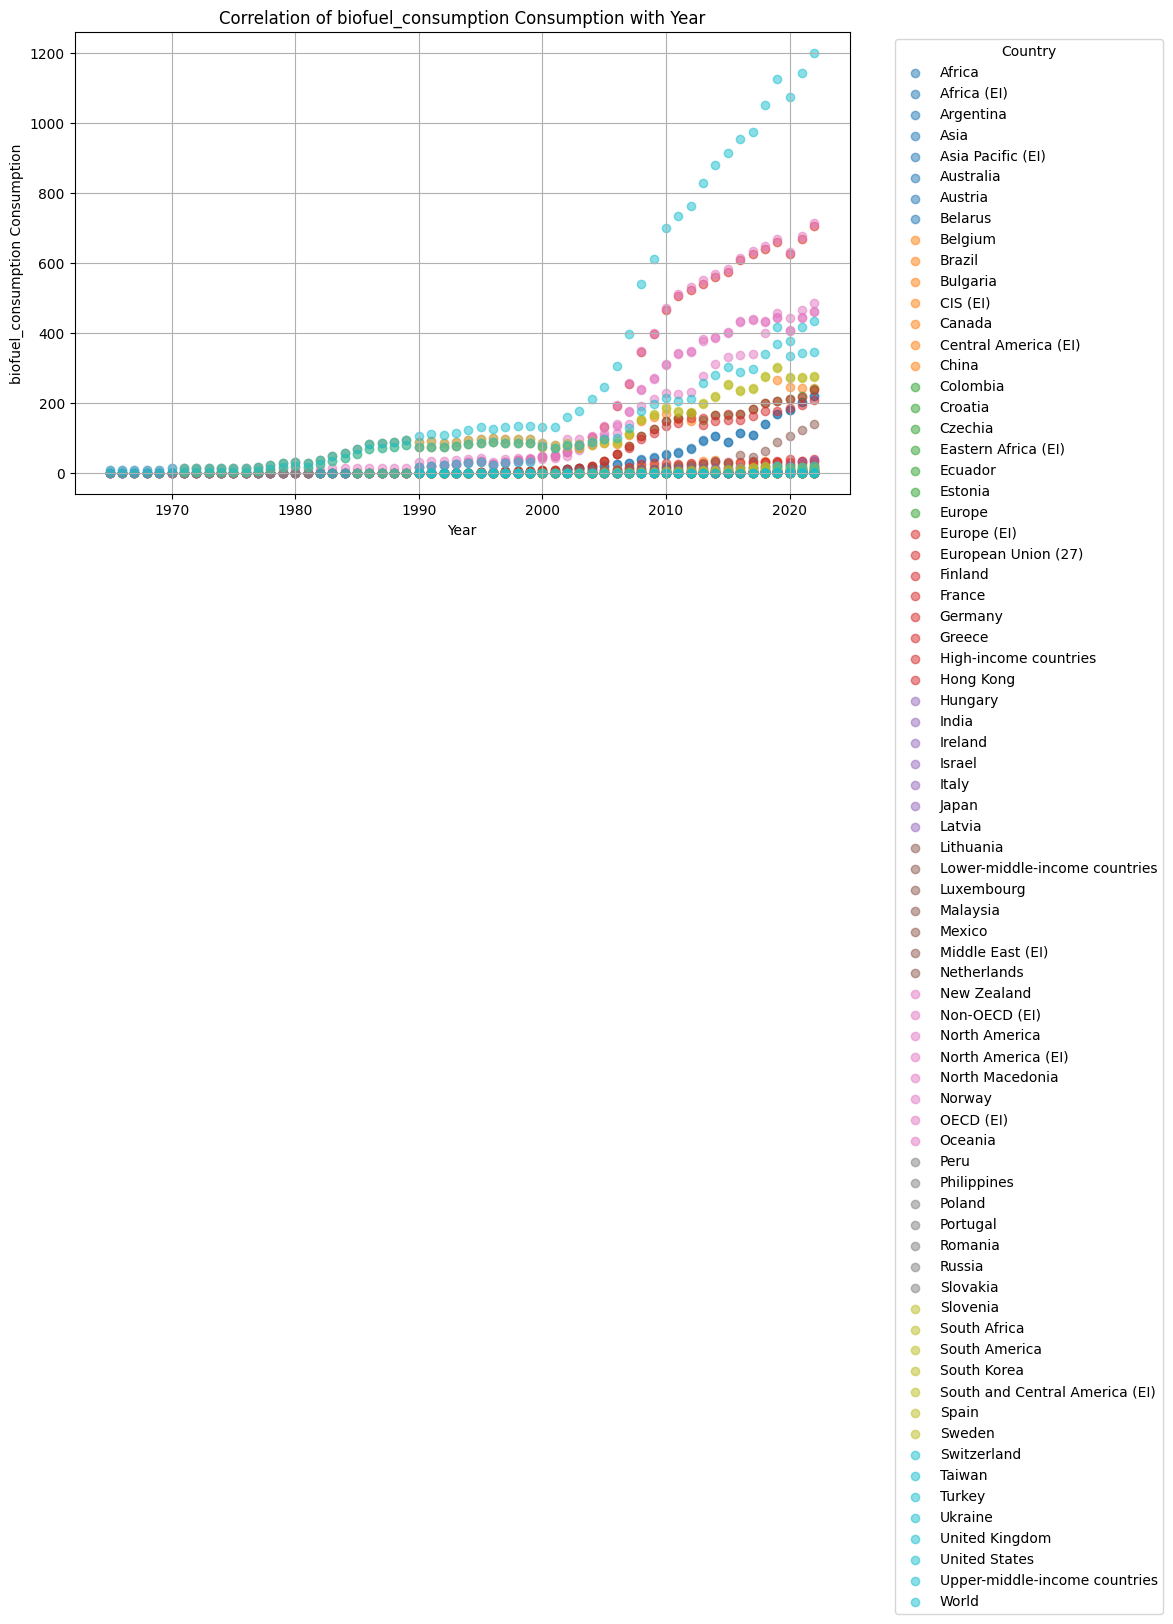

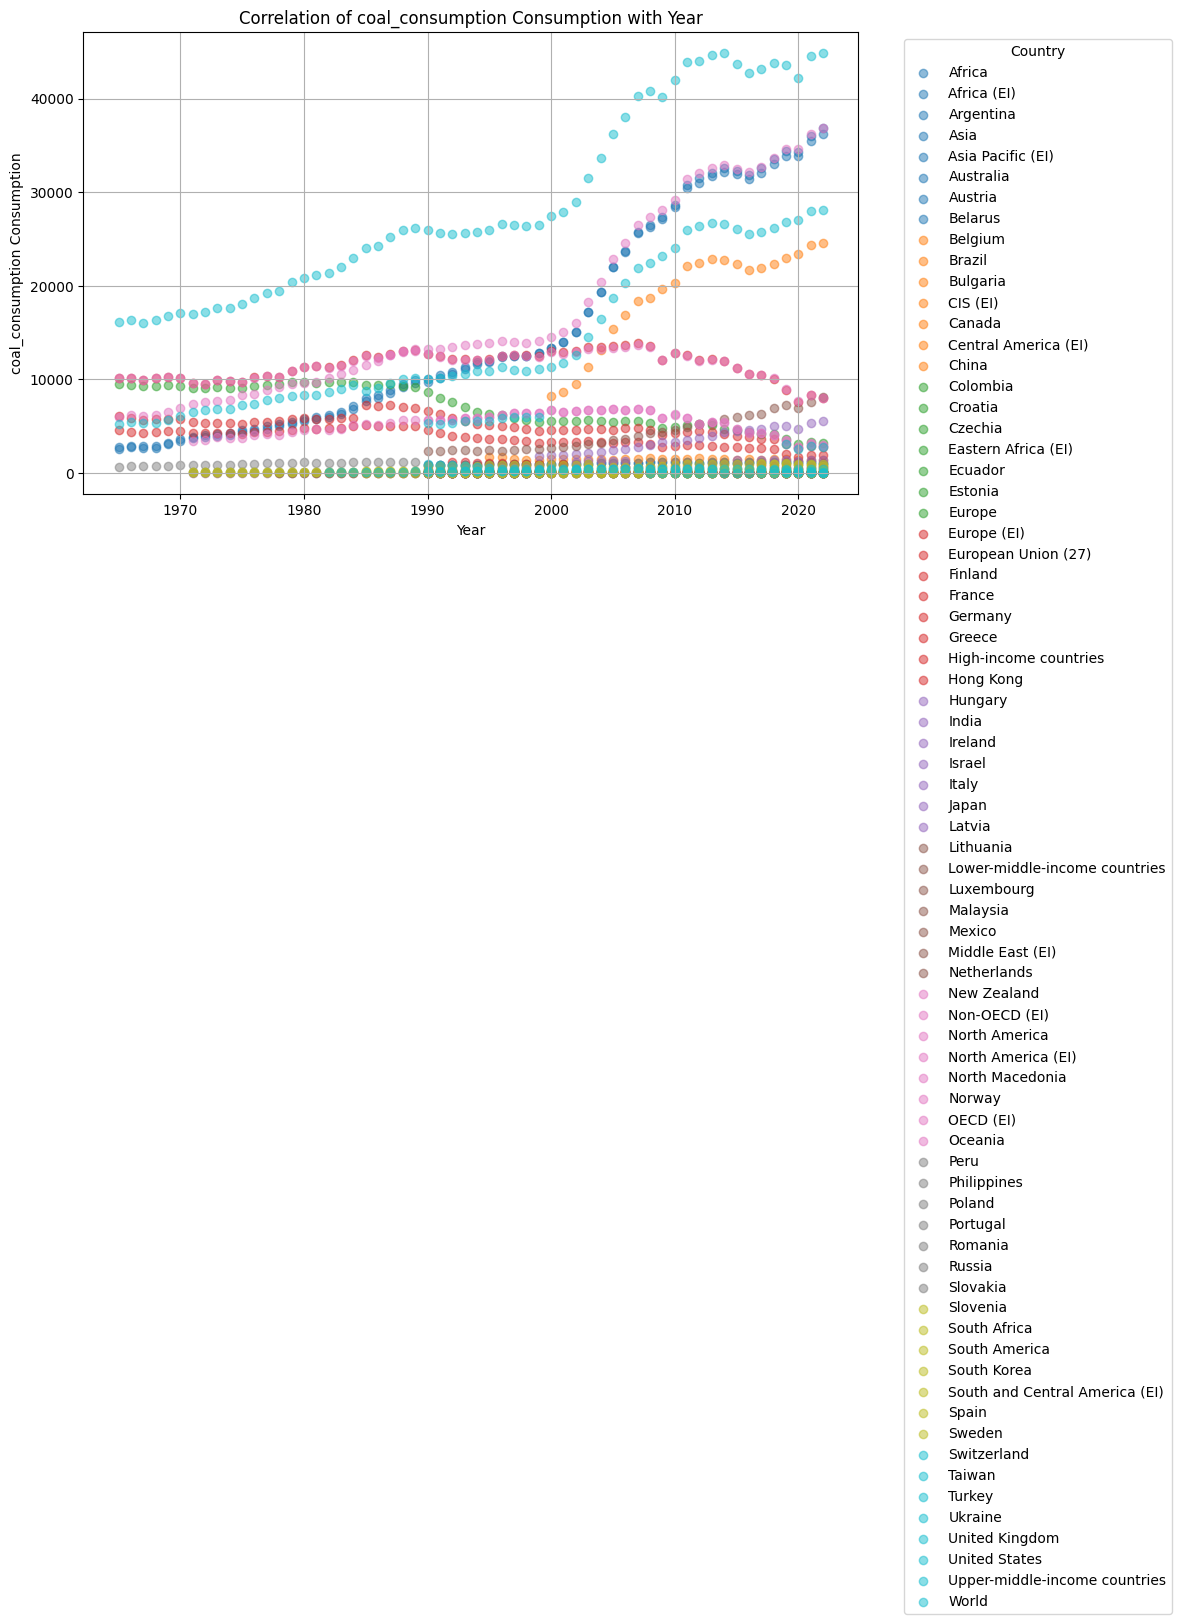

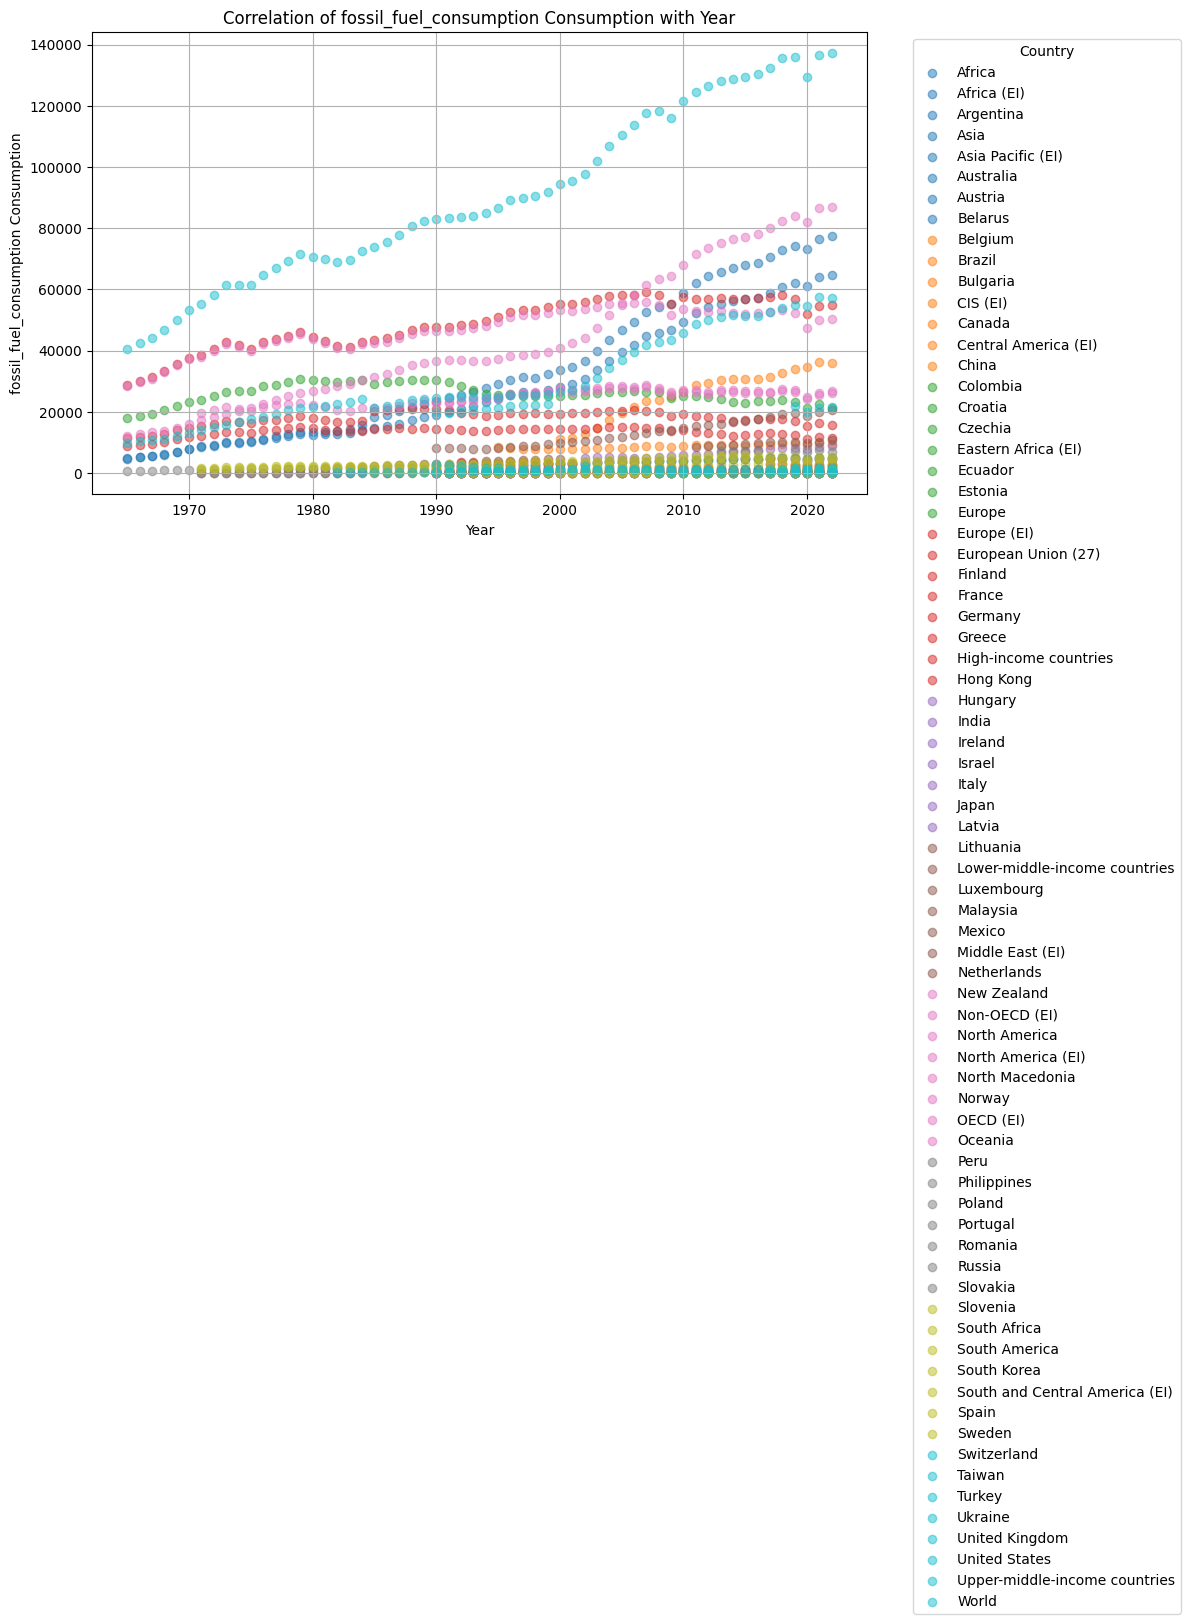

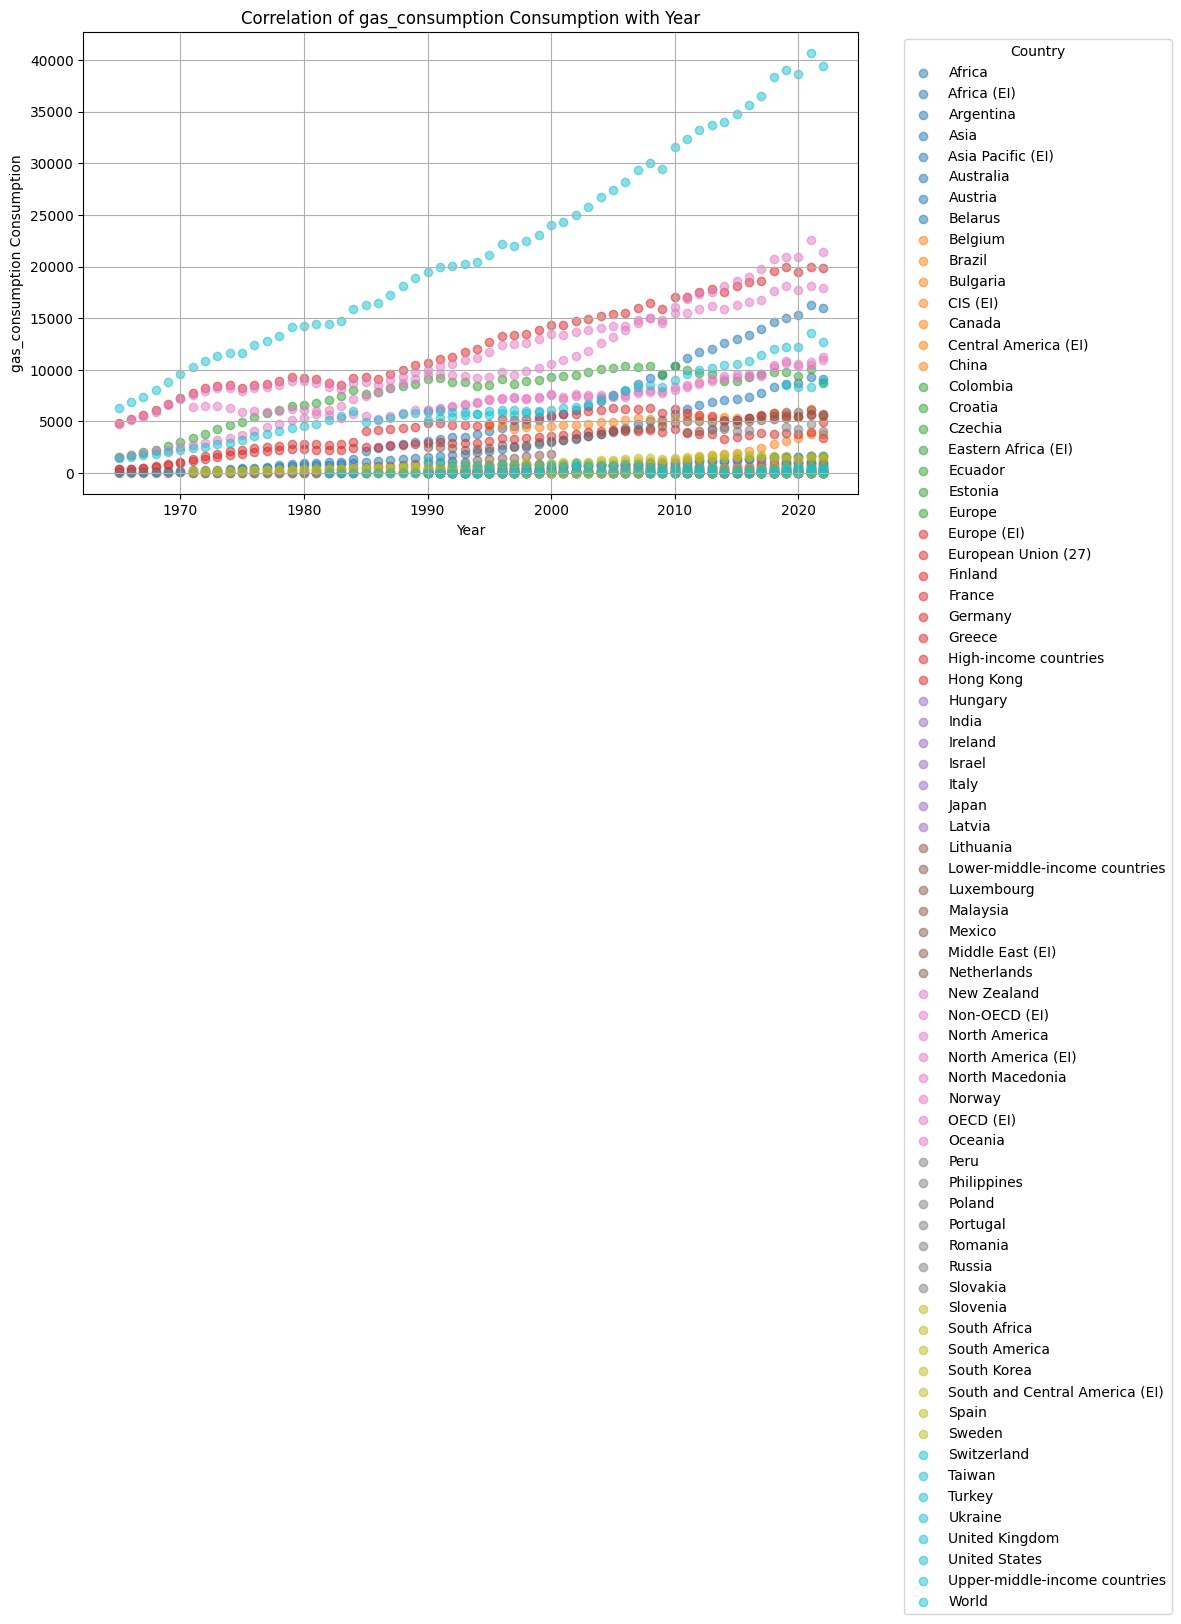

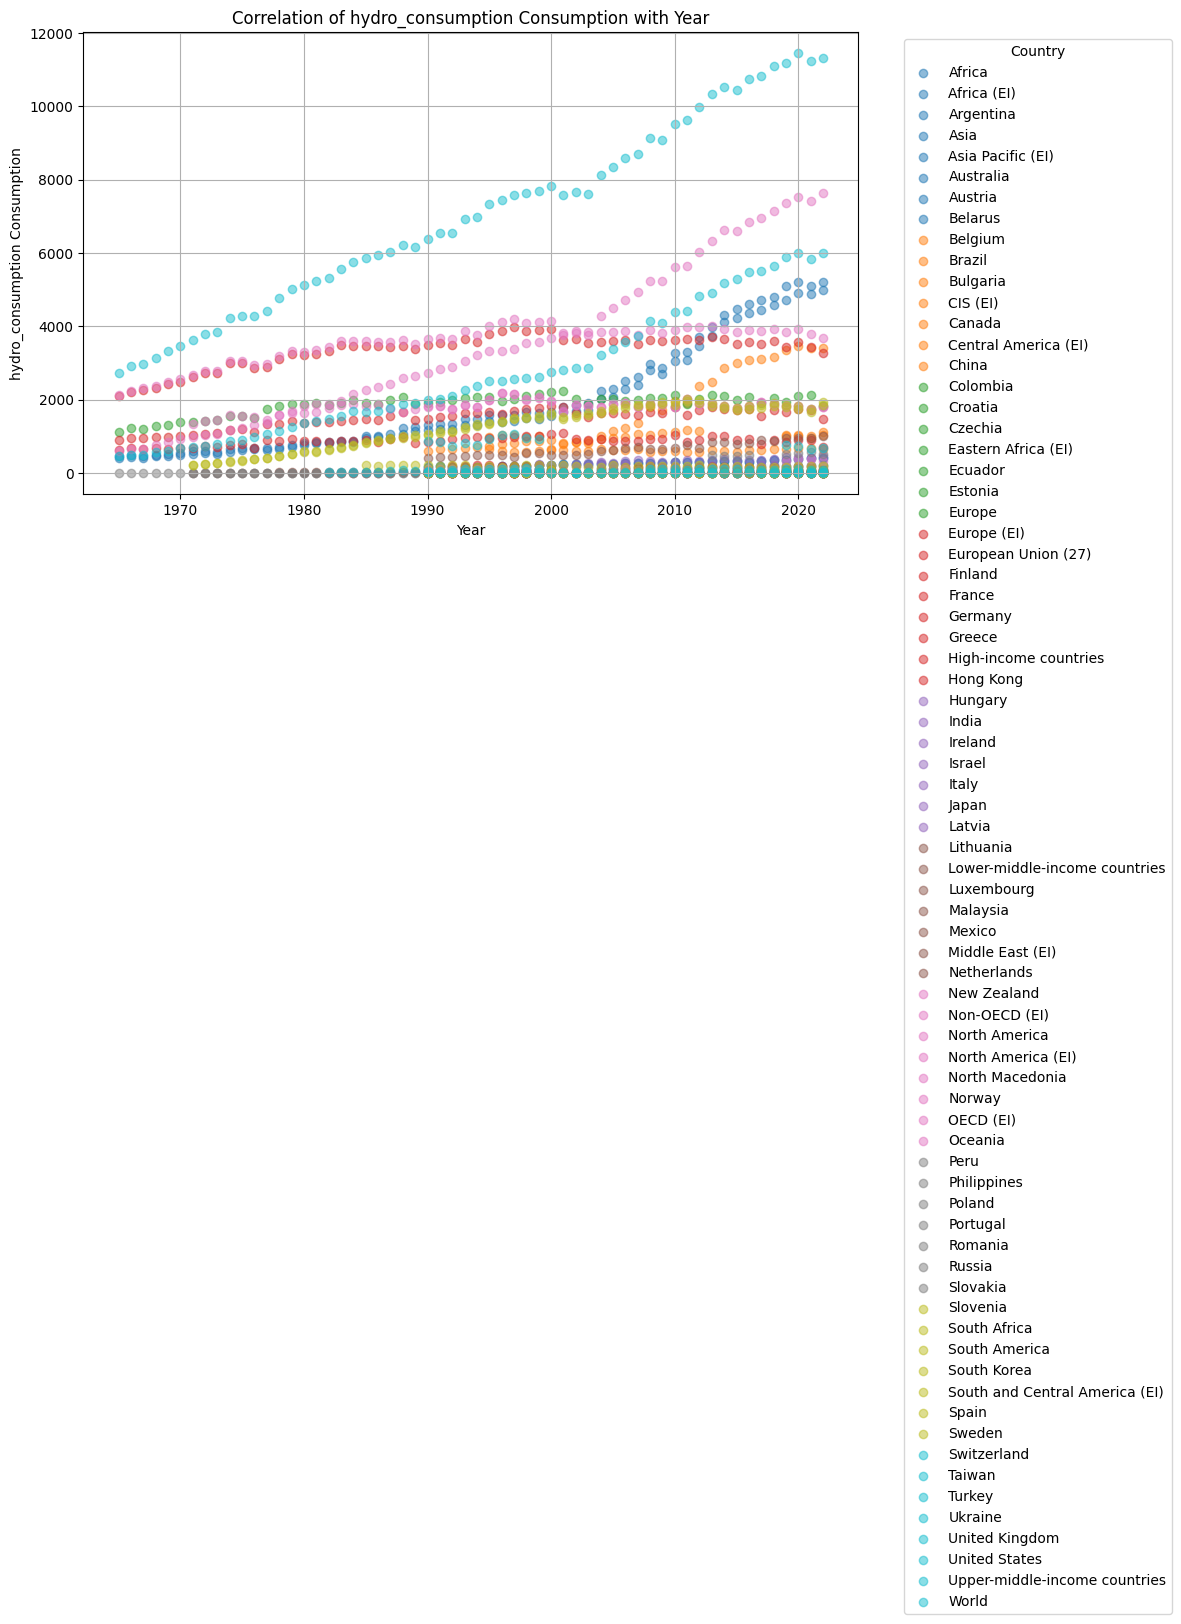

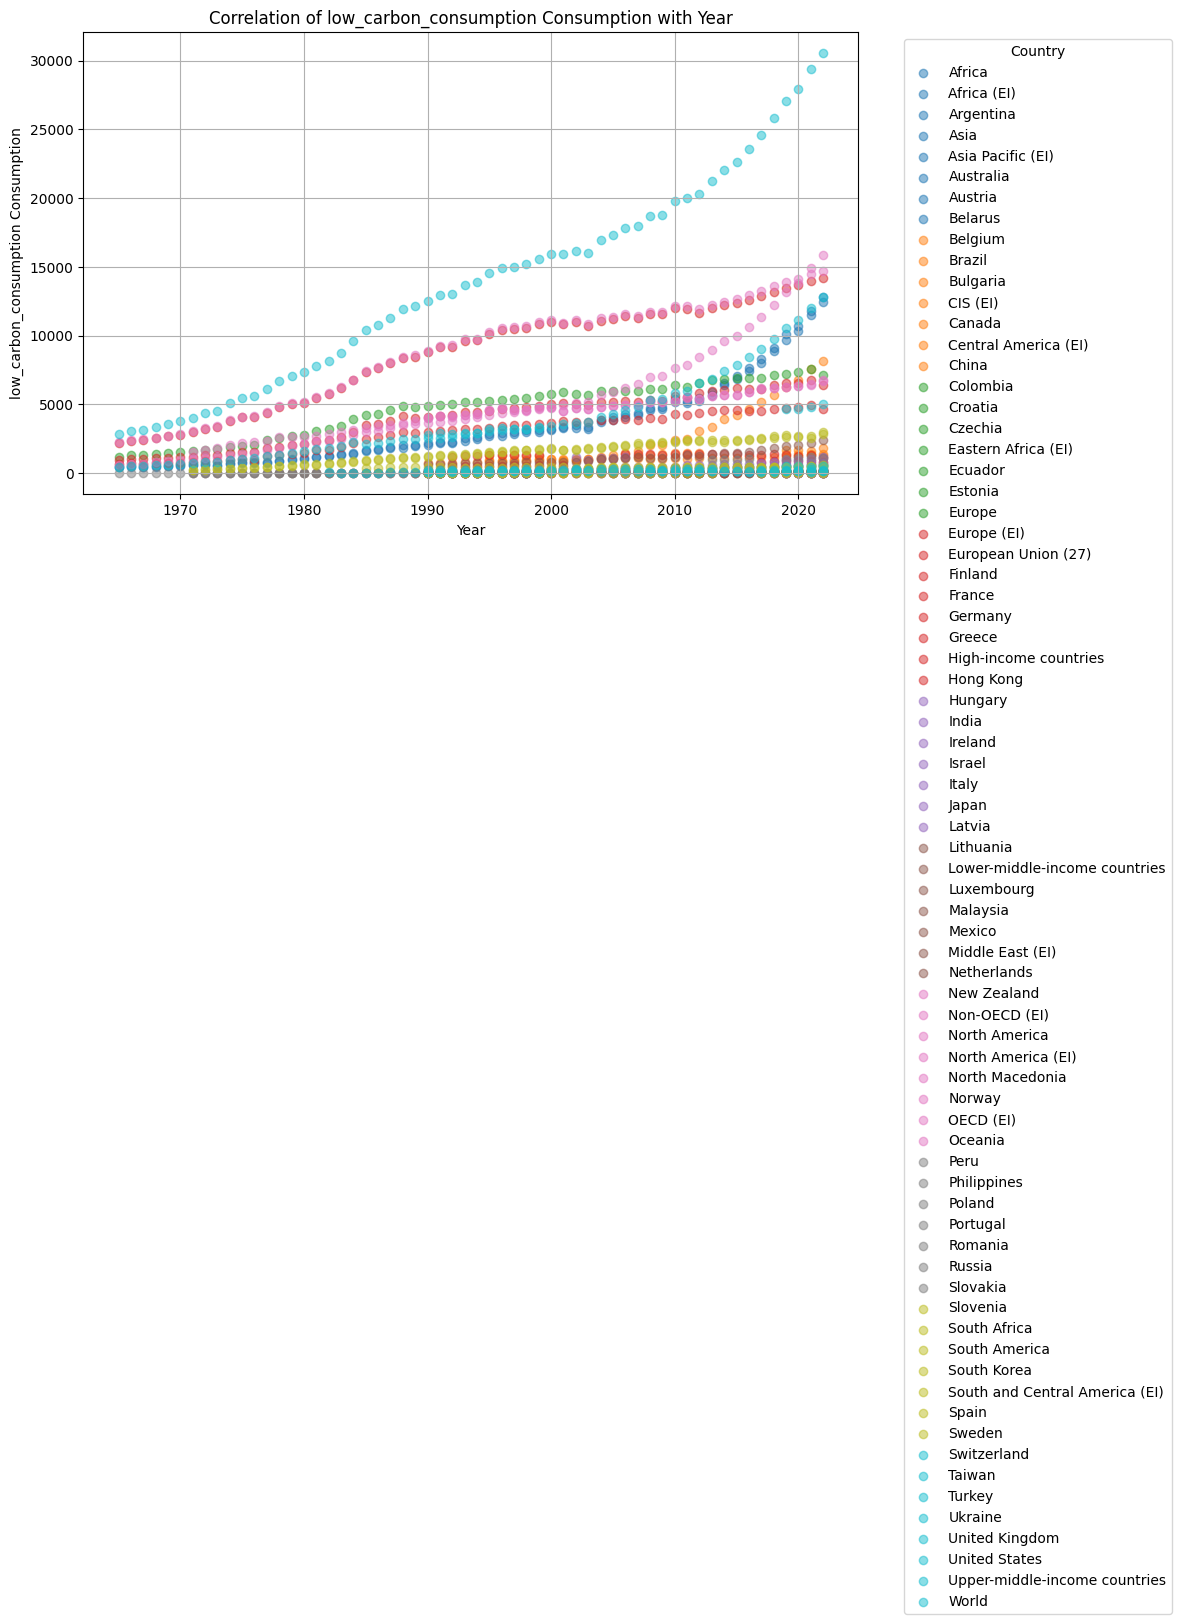

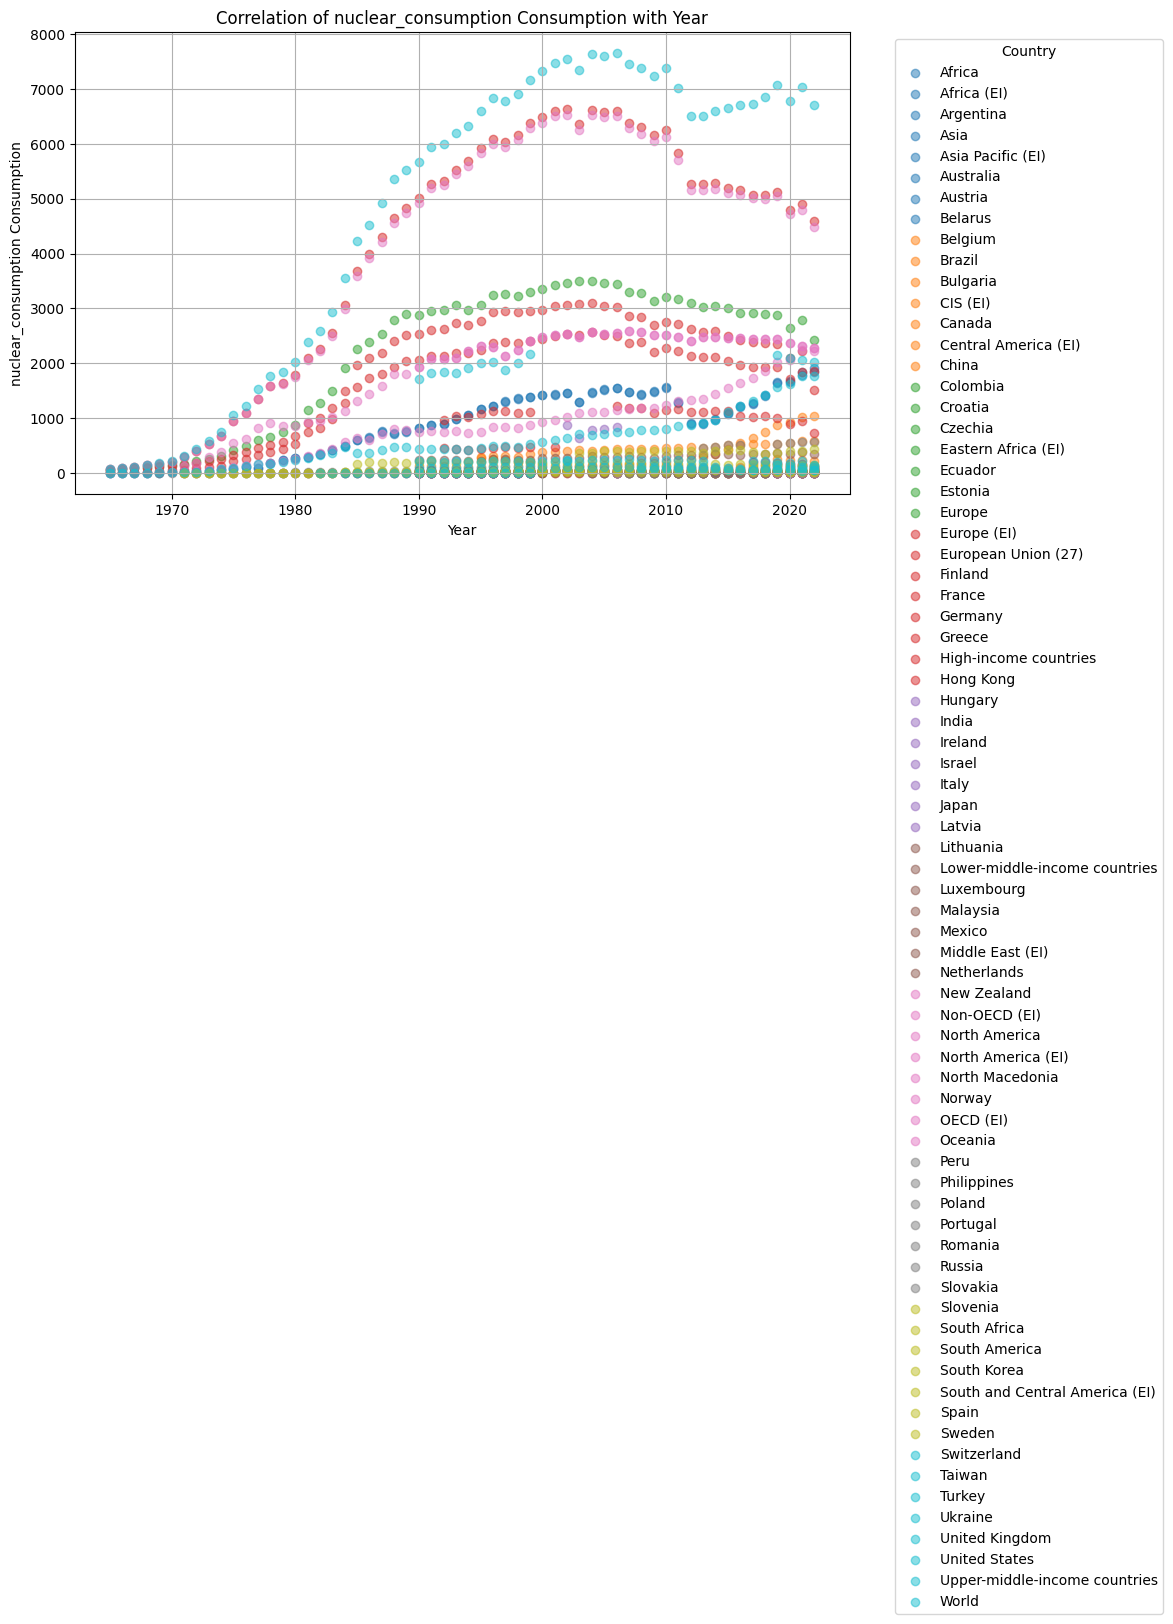

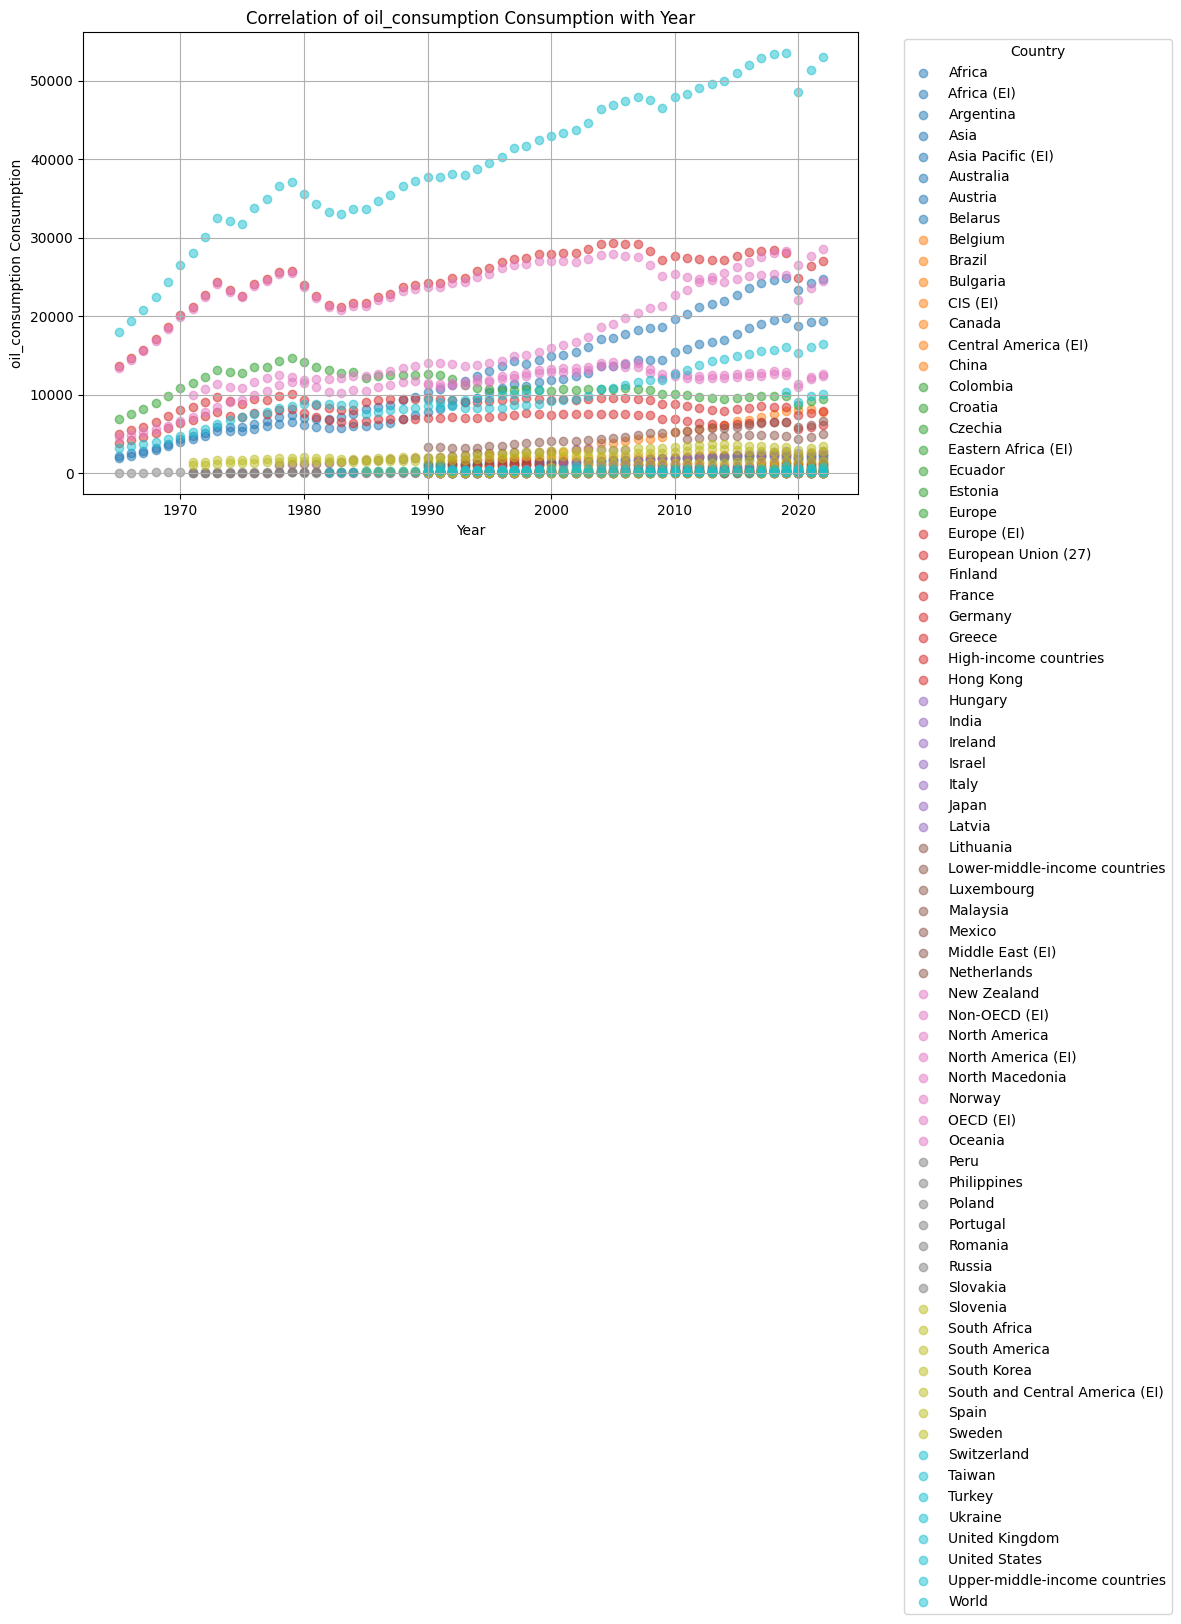

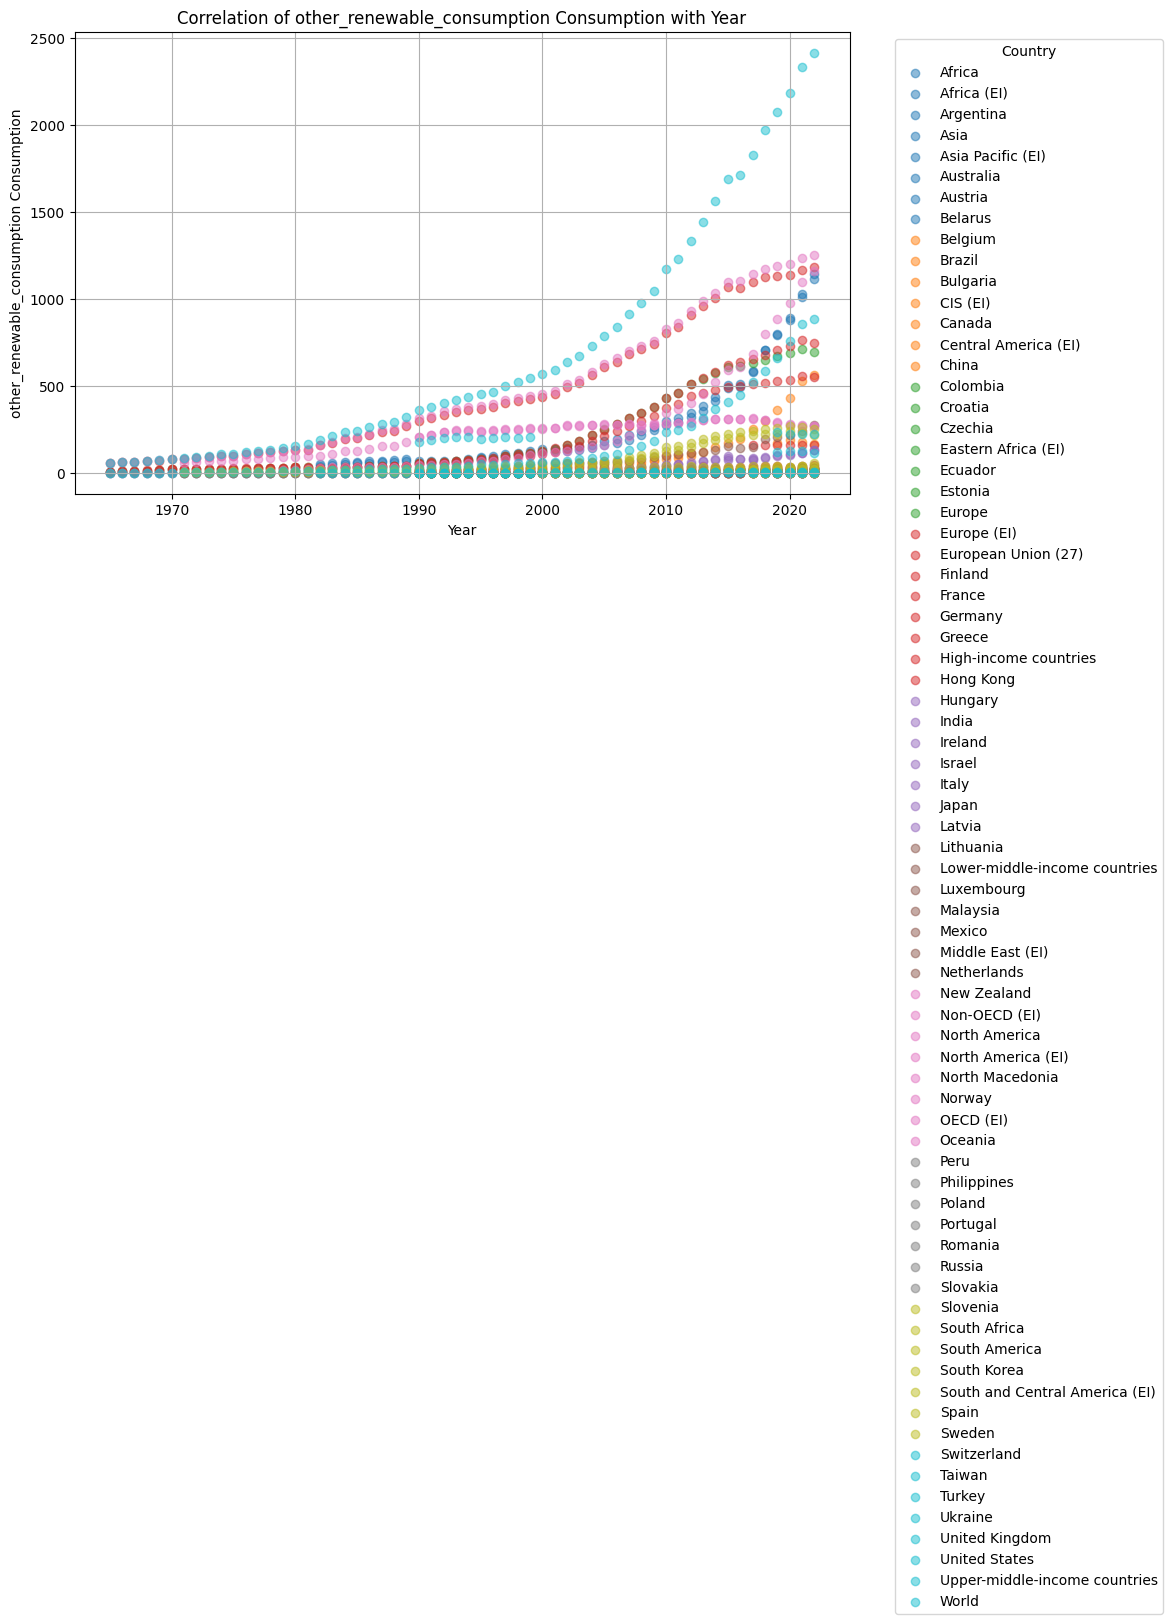

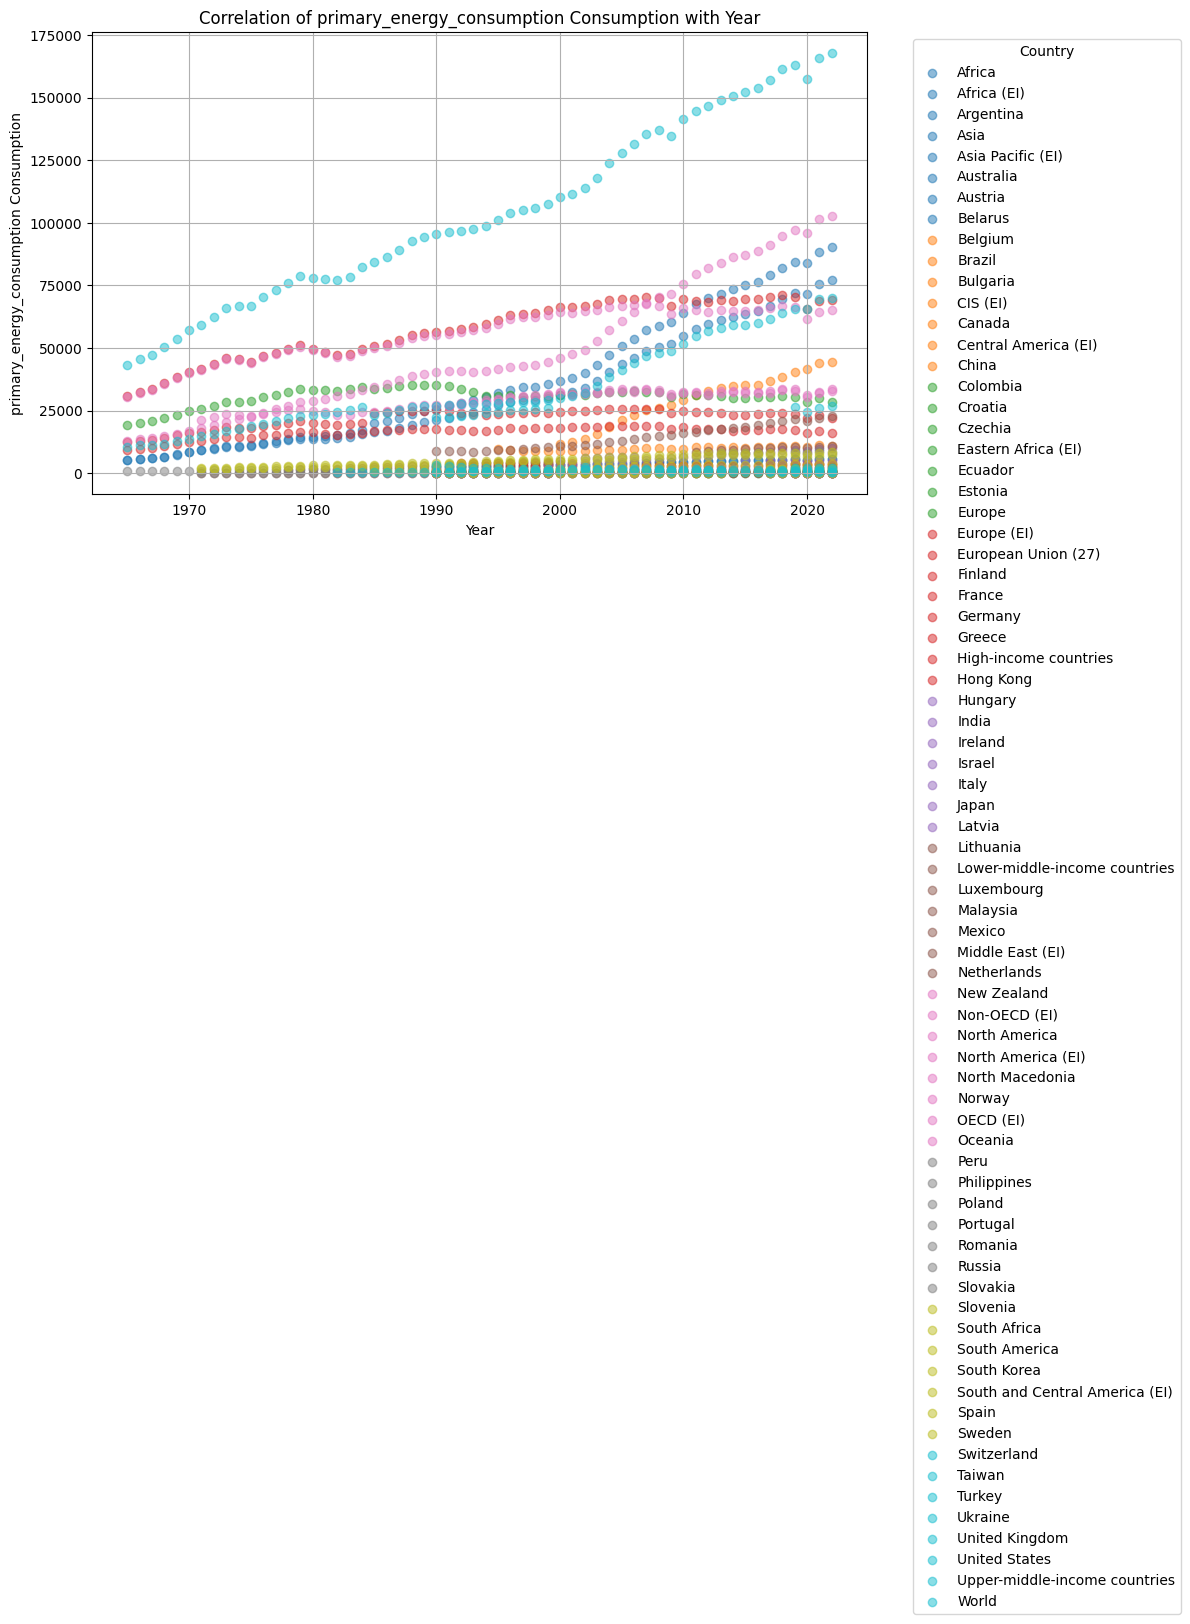

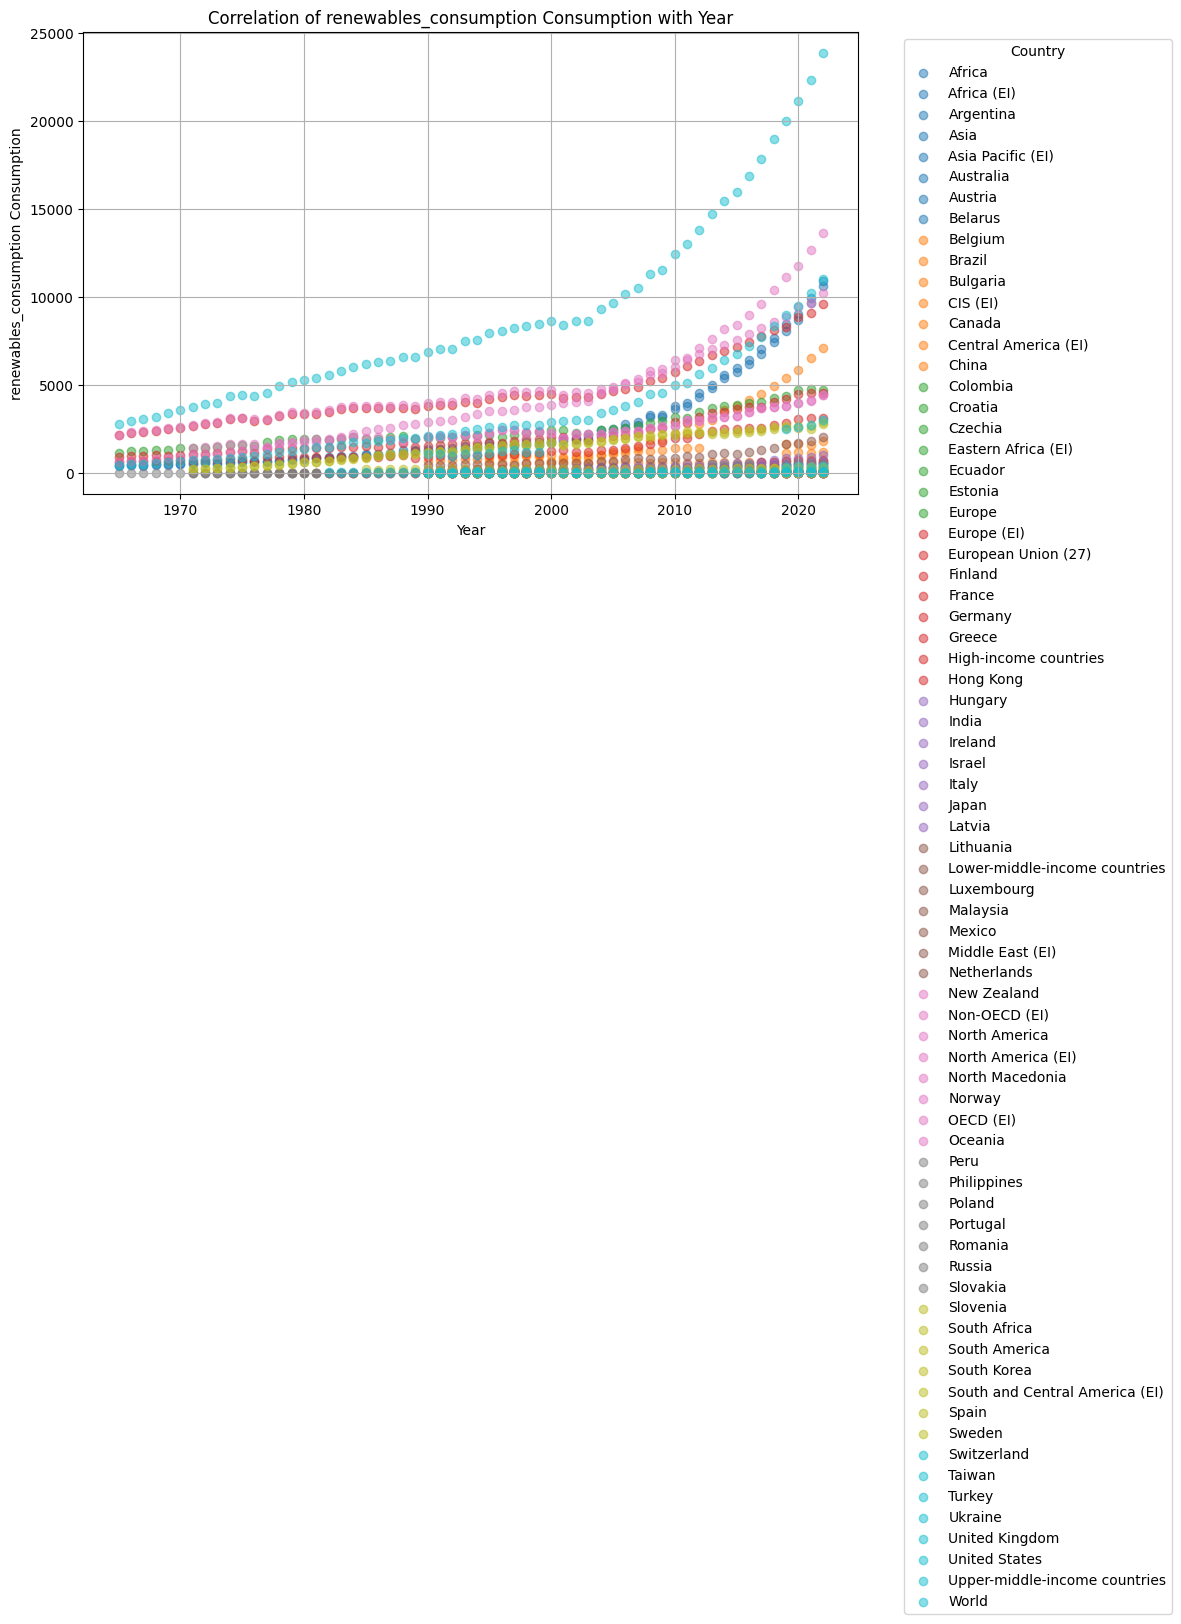

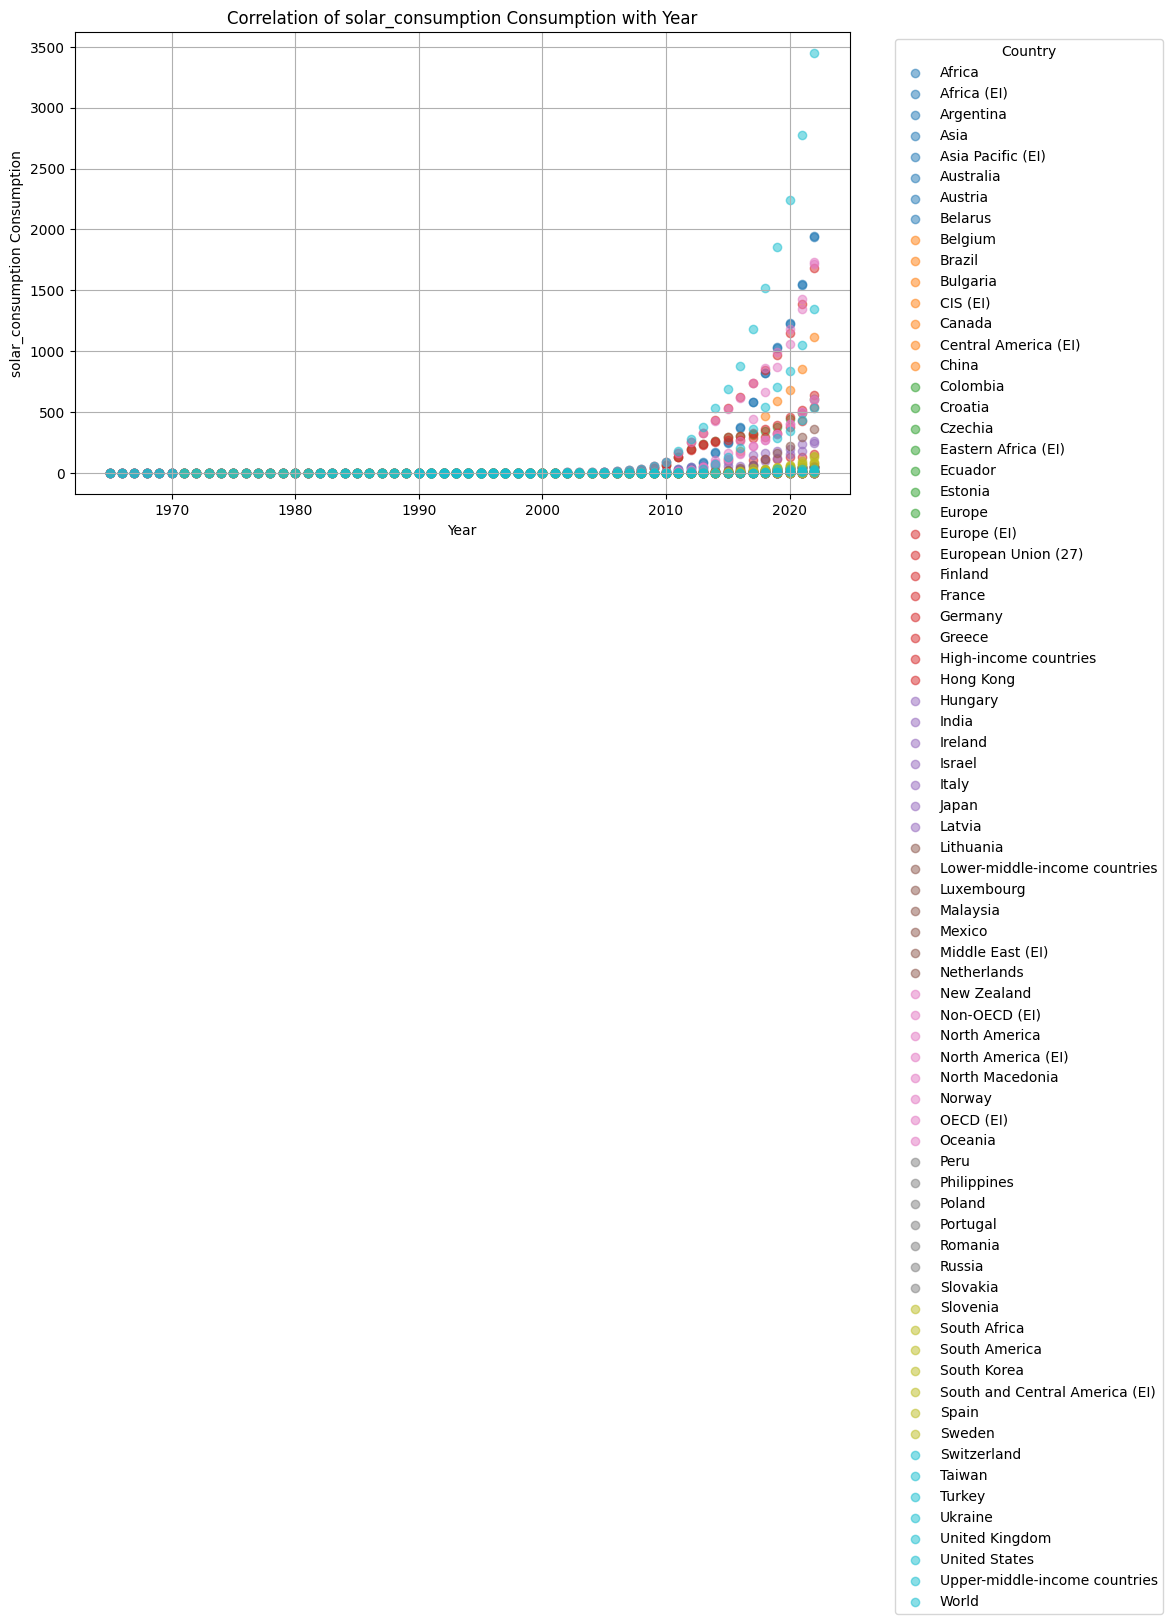

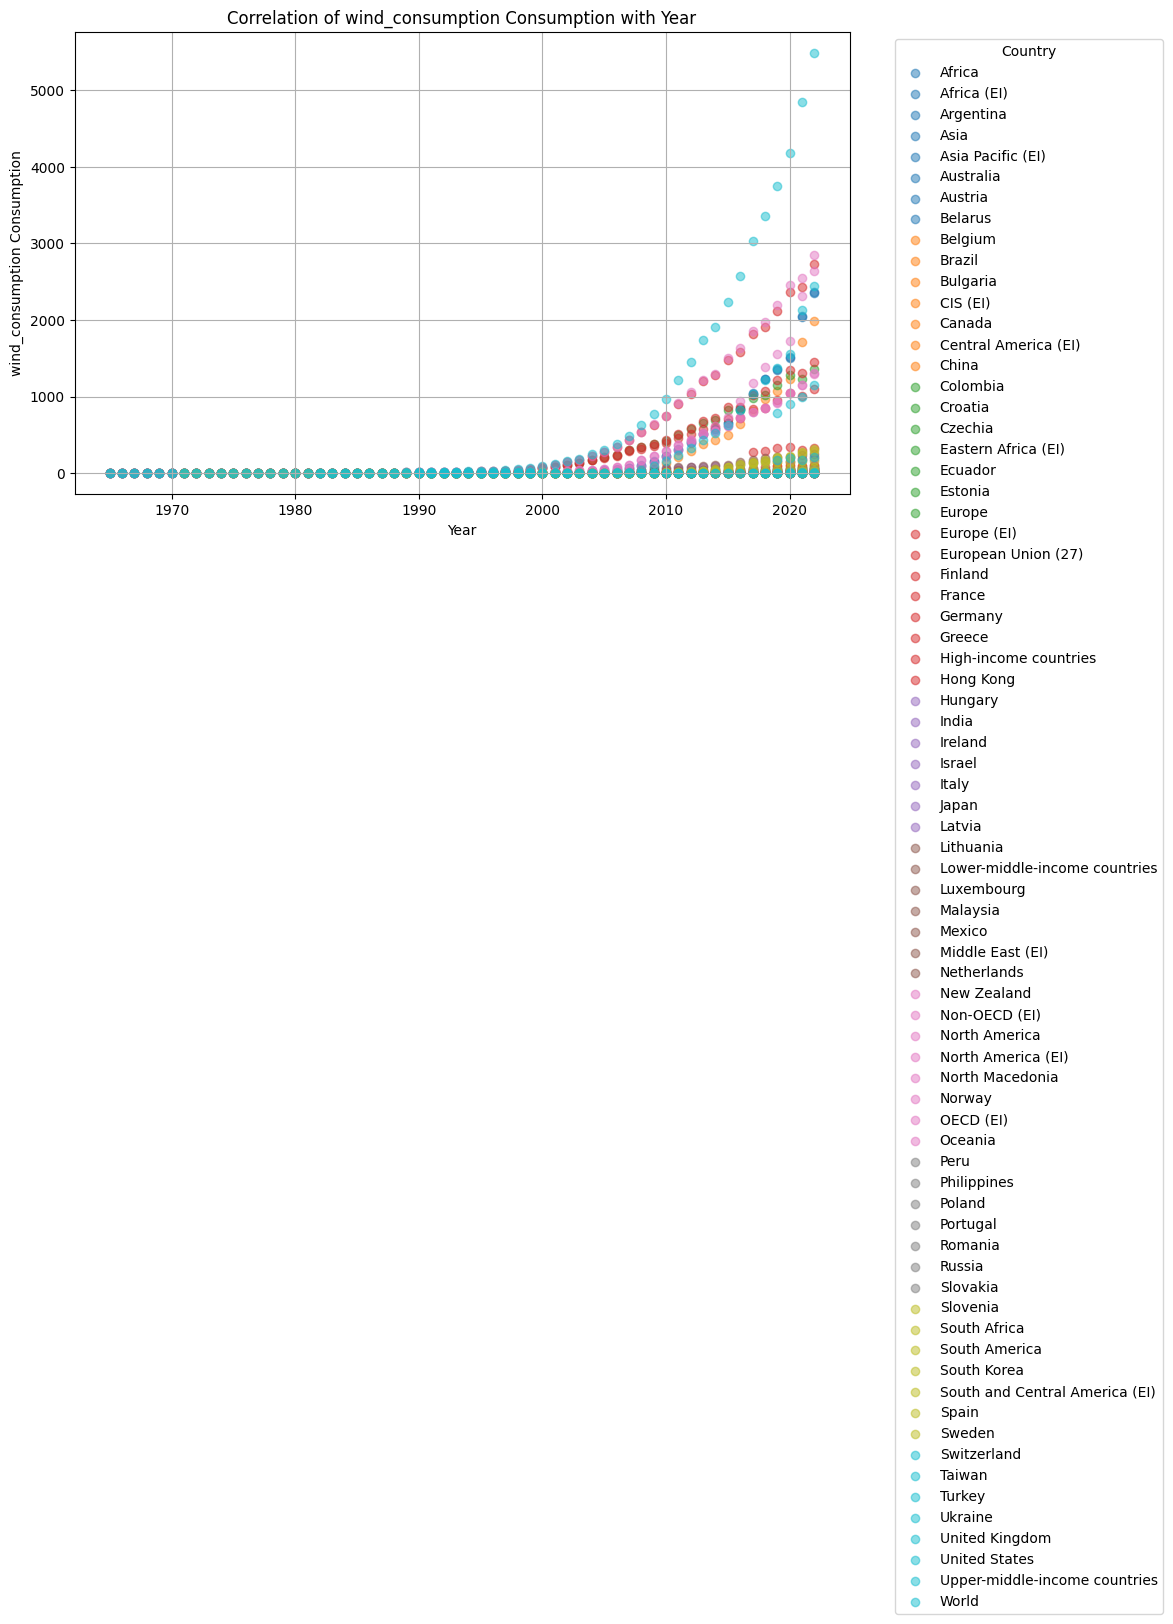

In [14]:
# Verificar se as colunas necessárias estão no DataFrame
required_columns = ['year', 'country'] + consumption_columns
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"As seguintes colunas estão faltando no DataFrame: {missing_columns}")

# Filtrar dados que possuem consumo de combustível
df_filtered = df[required_columns].dropna(subset=consumption_columns)

# Criar um mapeamento de cores personalizado para cada país
unique_countries = df_filtered['country'].unique()
num_colors = len(unique_countries)
colors = plt.cm.tab10(np.linspace(0, 1, num_colors))

country_color_map = {country: colors[i] for i, country in enumerate(unique_countries)}

# Plotar a correlação entre o ano e o consumo de combustível para cada tipo de combustível
for i, fuel in enumerate(consumption_columns):
    plt.figure(figsize=(10, 6))
    for j, country in enumerate(unique_countries):
        country_data = df_filtered[df_filtered['country'] == country]
        plt.scatter(country_data['year'], country_data[fuel], color=country_color_map[country], alpha=0.5, label=country)
    plt.xlabel('Year')
    plt.ylabel(f'{fuel} Consumption')
    plt.title(f'Correlation of {fuel} Consumption with Year')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

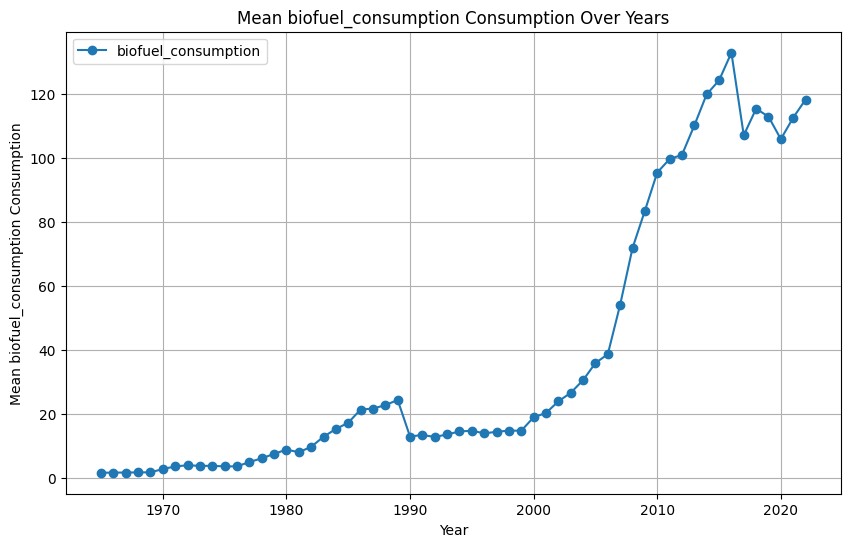

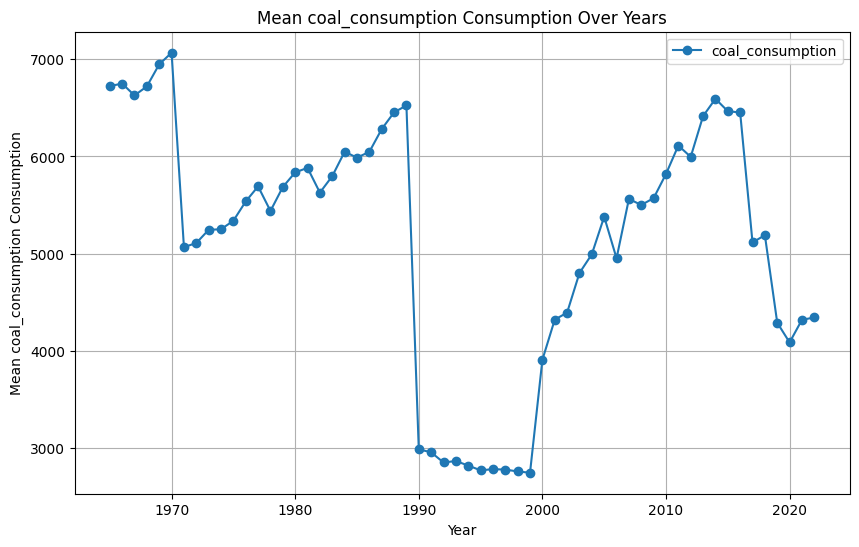

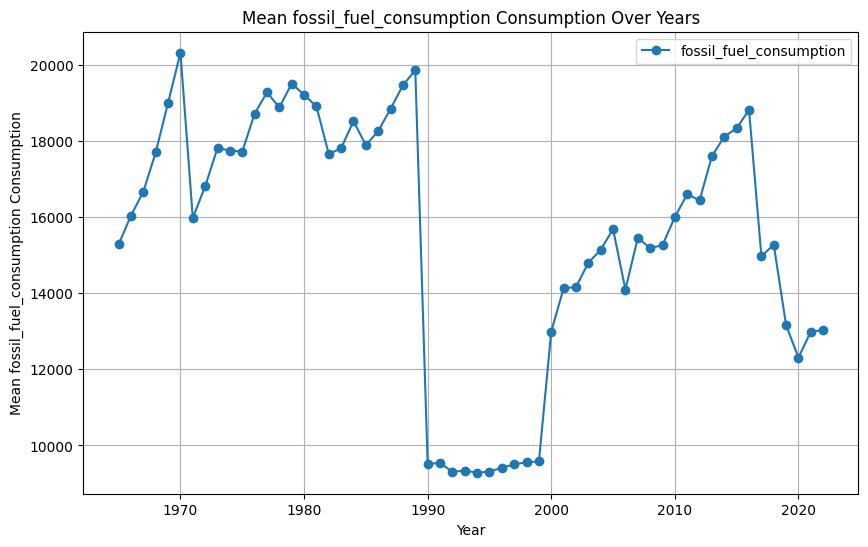

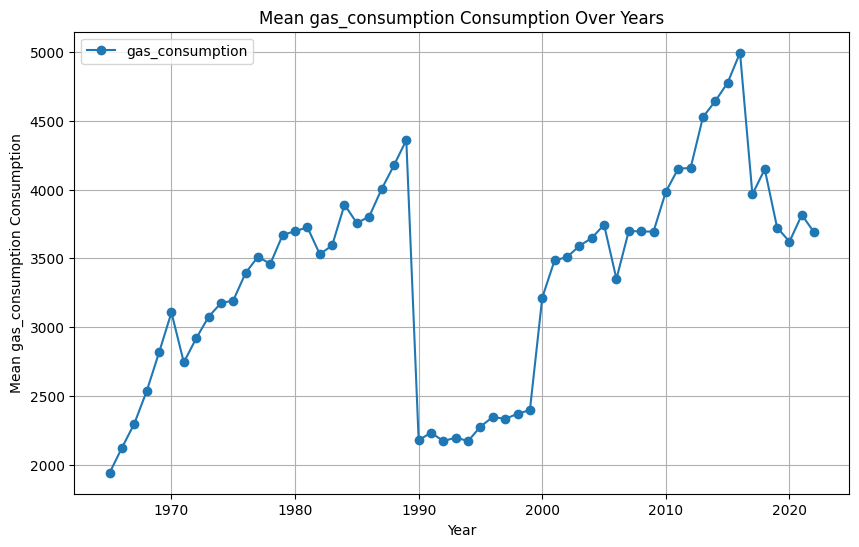

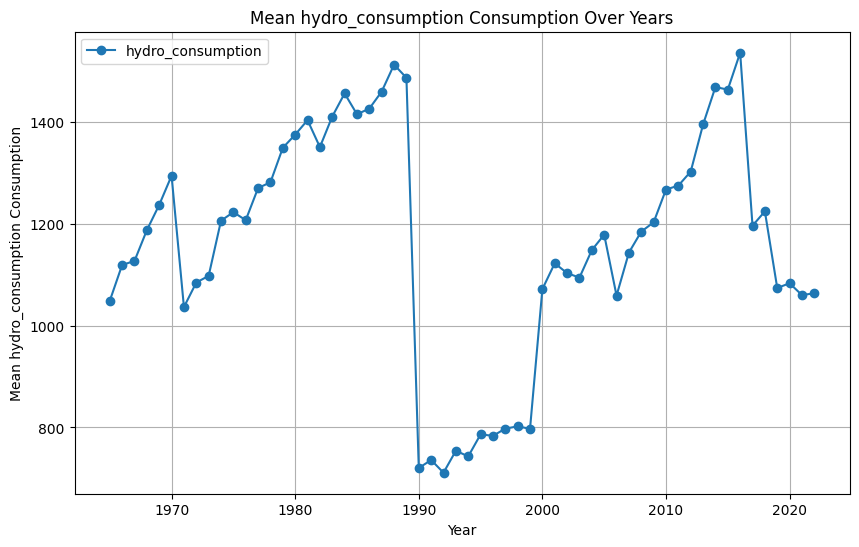

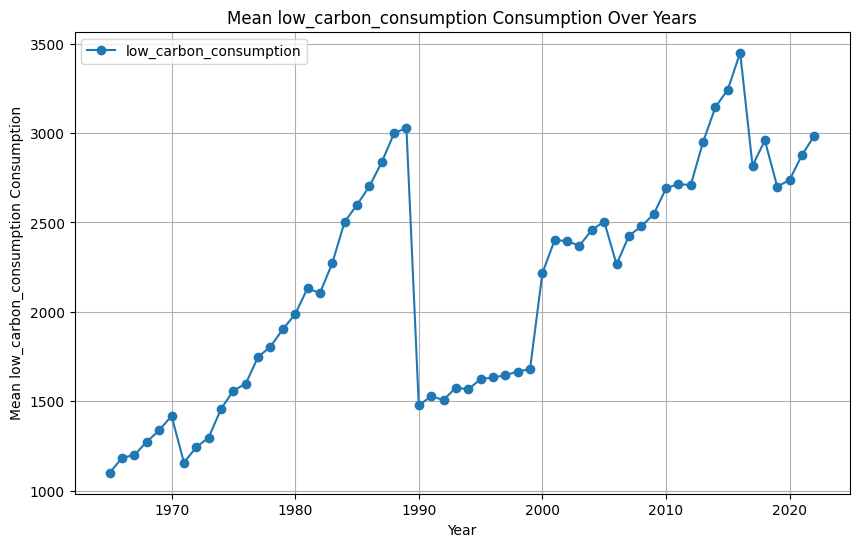

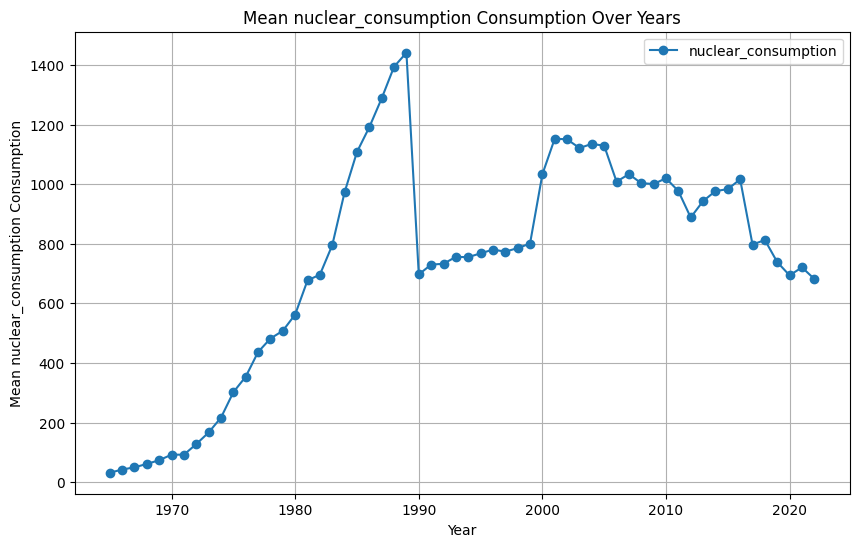

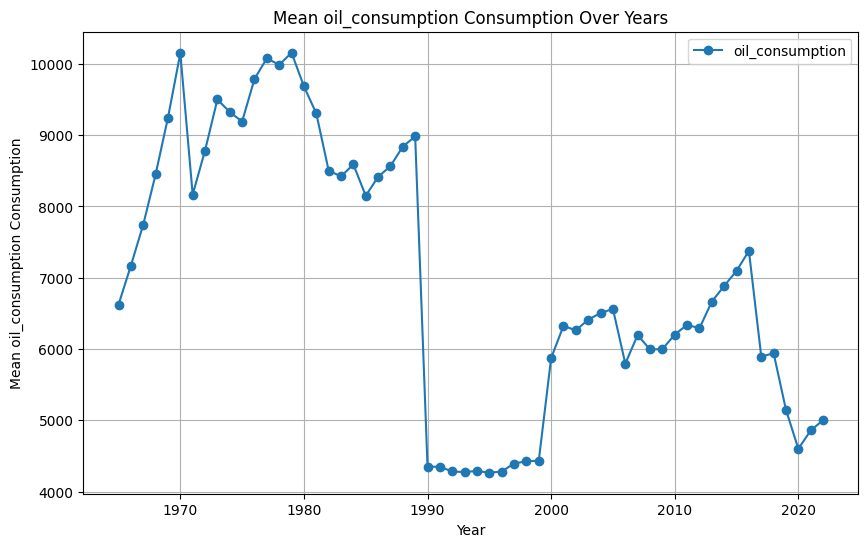

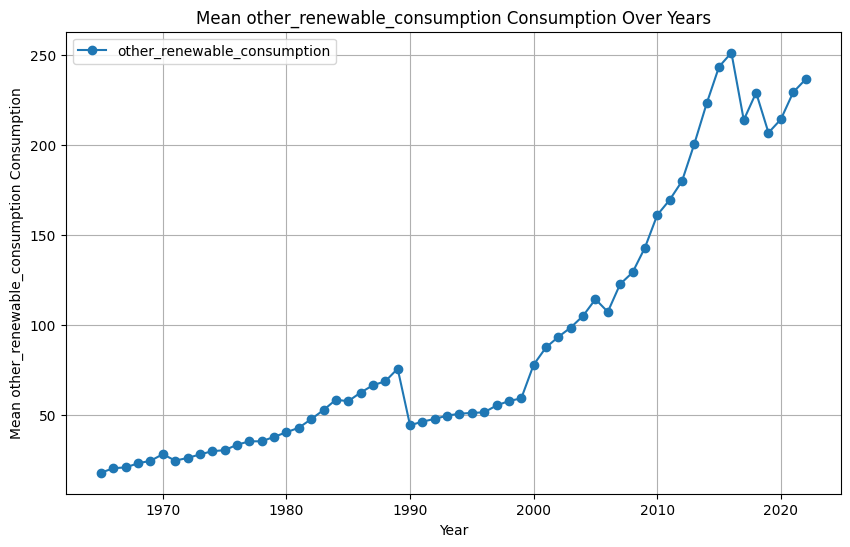

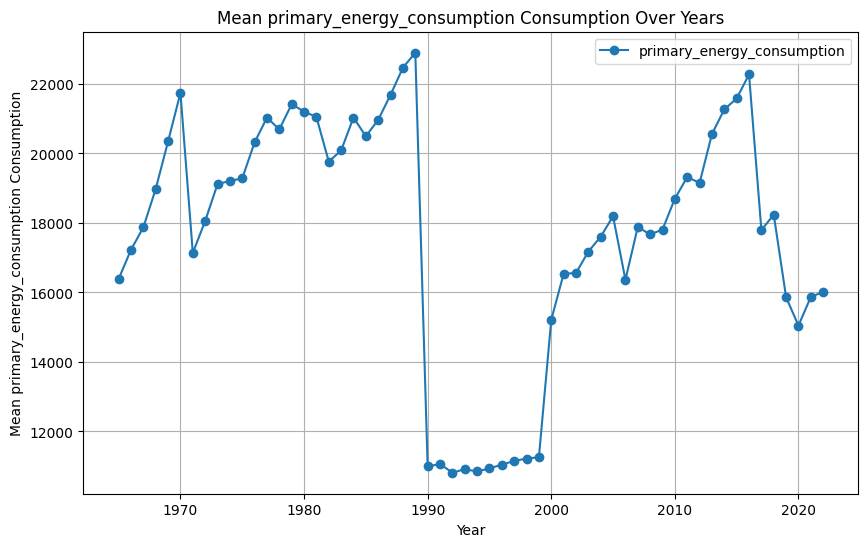

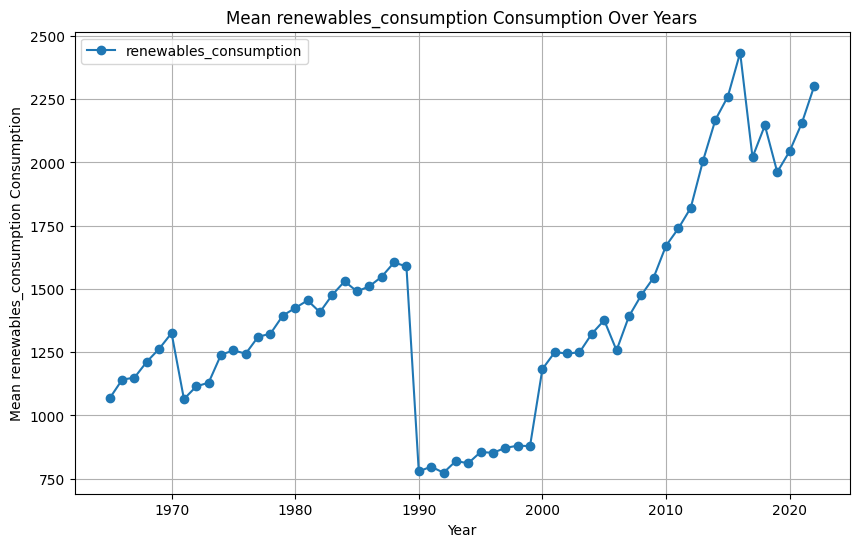

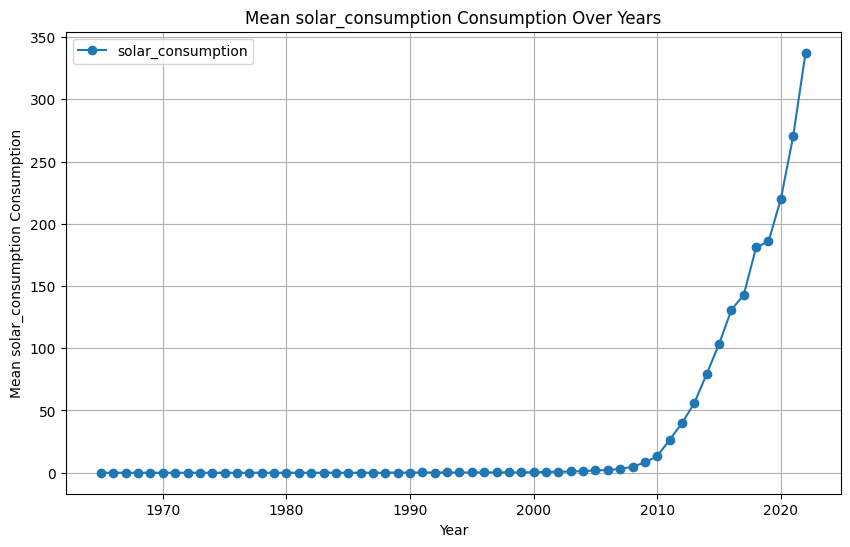

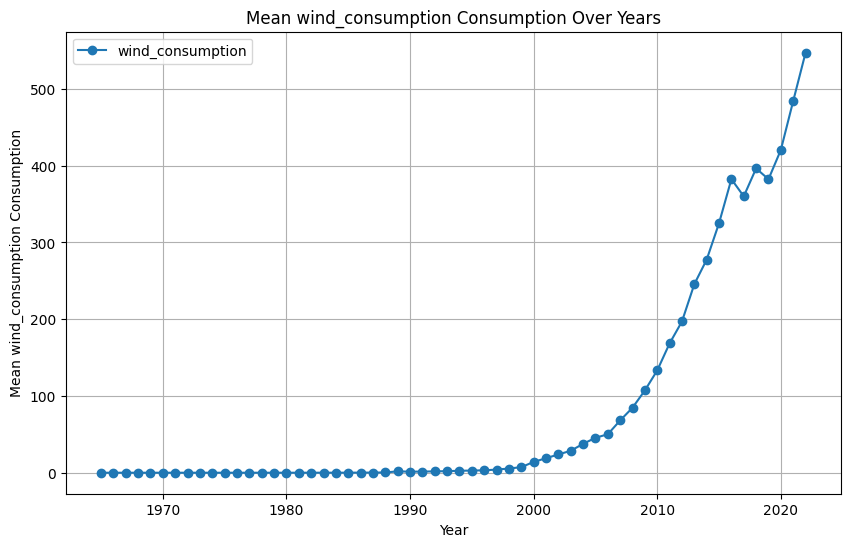

In [15]:
# Verificar se as colunas necessárias estão no DataFrame
required_columns = ['year', 'country'] + consumption_columns
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"As seguintes colunas estão faltando no DataFrame: {missing_columns}")

# Filtrar dados que possuem consumo de combustível
df_filtered = df[required_columns].dropna(subset=consumption_columns)

# Calcular a média do consumo por ano para cada tipo de combustível
mean_consumption_per_year = df_filtered.groupby('year')[consumption_columns].mean().reset_index()

# Plotar a média do consumo por ano para cada tipo de combustível
for fuel in consumption_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(mean_consumption_per_year['year'], mean_consumption_per_year[fuel], marker='o', linestyle='-', label=fuel)
    plt.xlabel('Year')
    plt.ylabel(f'Mean {fuel} Consumption')
    plt.title(f'Mean {fuel} Consumption Over Years')
    plt.legend()
    plt.grid(True)
    plt.show()

Checando anomalia em 1990

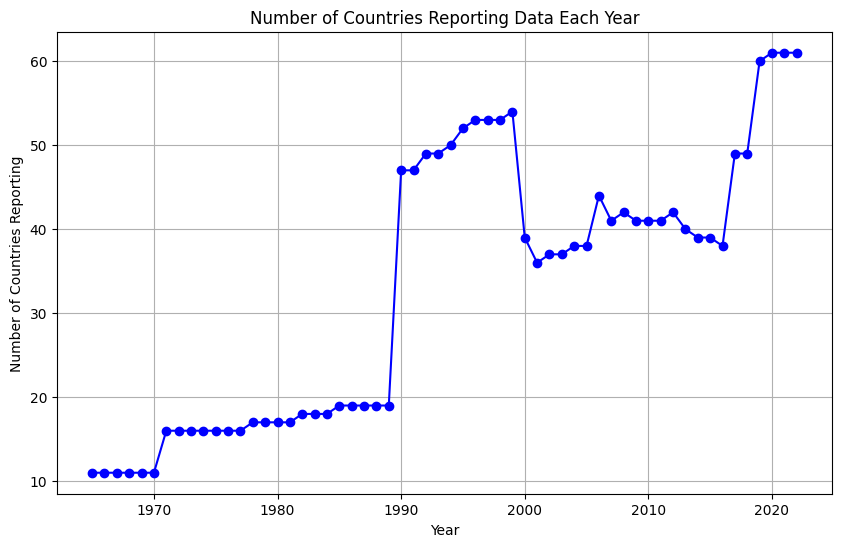

       year                         country  biofuel_consumption  \
235    1990                          Africa                0.000   
293    1990                     Africa (EI)                0.000   
1239   1990                            Asia                0.000   
1362   1990               Asia Pacific (EI)                0.000   
1767   1990                         Austria                0.074   
2376   1990                         Belgium                0.000   
2943   1990                          Brazil               73.802   
3231   1990                        Bulgaria                0.000   
4496   1990                        Colombia                0.000   
5139   1990                         Czechia                0.000   
6206   1990                         Estonia                0.000   
6652   1990                          Europe                0.074   
6710   1990                     Europe (EI)                0.074   
6973   1990             European Union (27)     

In [16]:
# Verificar se as colunas necessárias estão no DataFrame
required_columns = ['year', 'country'] + consumption_columns
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"As seguintes colunas estão faltando no DataFrame: {missing_columns}")

# Filtrar dados que possuem consumo de combustível
df_filtered = df[required_columns].dropna(subset=consumption_columns)

# Calcular a média do consumo por ano para cada tipo de combustível
mean_consumption_per_year = df_filtered.groupby('year')[consumption_columns].mean().reset_index()



# Analisar o número de países reportando dados a cada ano
countries_per_year = df_filtered.groupby('year')['country'].nunique().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(countries_per_year['year'], countries_per_year['country'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Countries Reporting')
plt.title('Number of Countries Reporting Data Each Year')
plt.grid(True)
plt.show()

# Examinar os dados de 1990
data_1990 = df_filtered[df_filtered['year'] == 1990]
print(data_1990)

Observamos uma variação acentuada nos dados de consumo de combustível entre os anos de 1990 e 2000. Inicialmente, a queda significativa foi atribuída a um evento histórico notável: a dissolução da União Soviética. Contudo, uma análise mais detalhada revelou um fator adicional determinante para essa variação. Durante esse período, houve um aumento substancial no número de países reportando suas matrizes energéticas, muitos dos quais eram países subdesenvolvidos ou em desenvolvimento.

A entrada desses países, com menores PIBs e, consequentemente, menores consumos médios de energia, influenciou significativamente as médias globais, resultando em uma aparente queda nos dados. Esse padrão de variação não é exclusivo dos anos 1990-2000, sendo observado também em outros períodos, como por exemplo em 2017. Nestes casos, a inclusão de novos países reportando dados, muitos deles com consumos energéticos inferiores, impacta diretamente as médias calculadas, criando a impressão de uma queda generalizada no consumo.

Portanto, ao analisar as tendências de consumo de combustível, é crucial considerar o contexto de expansão do conjunto de dados e a entrada de novos países com diferentes perfis econômicos e energéticos. Isso evita interpretações equivocadas das variações nas médias e proporciona uma compreensão mais precisa dos fatores subjacentes às mudanças observadas.

Filtrando dados depois de 1990

In [17]:
# Filtrar dados a partir de 1990
df = df[df['year'] >= 1990]

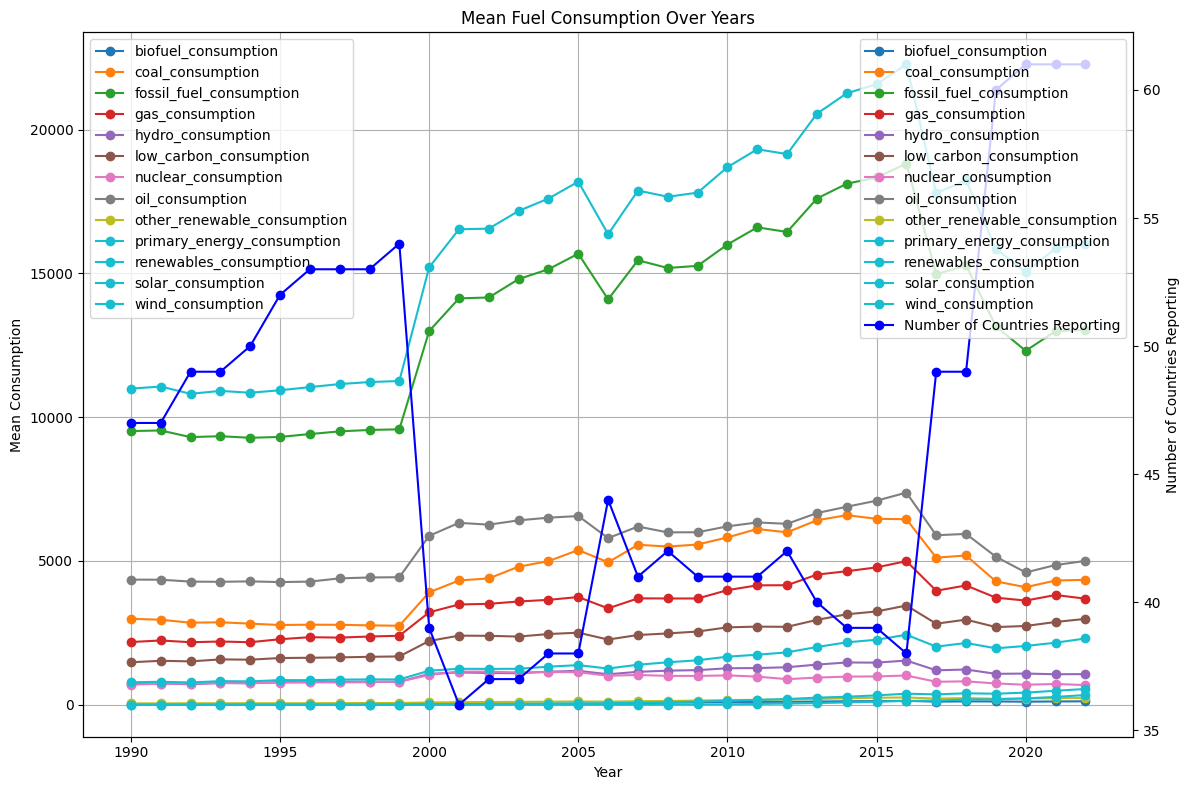

       year                         country  biofuel_consumption  \
235    1990                          Africa                0.000   
293    1990                     Africa (EI)                0.000   
1239   1990                            Asia                0.000   
1362   1990               Asia Pacific (EI)                0.000   
1767   1990                         Austria                0.074   
2376   1990                         Belgium                0.000   
2943   1990                          Brazil               73.802   
3231   1990                        Bulgaria                0.000   
4496   1990                        Colombia                0.000   
5139   1990                         Czechia                0.000   
6206   1990                         Estonia                0.000   
6652   1990                          Europe                0.074   
6710   1990                     Europe (EI)                0.074   
6973   1990             European Union (27)     

In [18]:
# Verificar se as colunas necessárias estão no DataFrame
required_columns = ['year', 'country'] + consumption_columns
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"As seguintes colunas estão faltando no DataFrame: {missing_columns}")

# Filtrar dados que possuem consumo de combustível
df_filtered = df[required_columns].dropna(subset=consumption_columns)

# Filtrar dados a partir de 1990
df_filtered = df_filtered[df_filtered['year'] >= 1990]

# Calcular a média do consumo por ano para cada tipo de combustível
mean_consumption_per_year = df_filtered.groupby('year')[consumption_columns].mean().reset_index()

# Analisar o número de países reportando dados a cada ano
countries_per_year = df_filtered.groupby('year')['country'].nunique().reset_index()

# Criar uma figura e um eixo
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotar a média do consumo por ano para cada tipo de combustível
colors = plt.cm.tab10(range(len(consumption_columns)))
for i, fuel in enumerate(consumption_columns):
    ax1.plot(mean_consumption_per_year['year'], mean_consumption_per_year[fuel], marker='o', linestyle='-', label=fuel, color=colors[i])

# Configurar o primeiro eixo
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Consumption')
ax1.set_title('Mean Fuel Consumption Over Years')
ax1.legend()
ax1.grid(True)

# Criar um segundo eixo para o número de países reportando dados
ax2 = ax1.twinx()
ax2.plot(countries_per_year['year'], countries_per_year['country'], marker='o', linestyle='-', color='b', label='Number of Countries Reporting')
ax2.set_ylabel('Number of Countries Reporting')

# Adicionar a legenda do segundo eixo
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Mostrar o gráfico
plt.show()

# Examinar os dados de 1990
data_1990 = df_filtered[df_filtered['year'] == 1990]
print(data_1990)

In [26]:
# Substituir valores ausentes pela média
df.fillna(df.mean(), inplace=True)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# Selecionar as colunas relevantes
data = df[['year', 'country', 'gdp'] + consumption_columns]

# Iterar sobre cada tipo de energia e realizar a análise de regressão
for fuel in consumption_columns:
    # Análise de Regressão Linear Simples
    X = data['gdp']
    y = data[fuel]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Imprimir sumário da regressão
    print(f"Análise de Regressão para {fuel}:")
    print(model.summary())
    
    # Plotar a linha de regressão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='gdp', y=fuel)
    plt.plot(data['GDP'], model.predict(X), color='red')
    plt.xlabel('PIB')
    plt.ylabel(f'Consumo de {fuel}')
    plt.title(f'Regressão Linear entre PIB e Consumo de {fuel}')
    plt.show()